#**Intoduction:**
### Appliance Energy Prediction of a household is an approach to predict the energy consumptions in the future by that household within a given interval of time. The amount of energy consumed by a household will significantly depend on the physical or natural conditions of the locality in which that house exists.

### The dataset consists information about energy consumed(in watt-hour), temperatures and humidity conditions both inside and outside the house, atmospheric pressure, visibility, Tdewpoint(from a local weather station) which are recorded at every 10 minutes for 4.5 months. Our objective is to make energy predictions using Supervised Machine Learning, which includes Data cleaning and explorations, Data preprocessing, Modeling, Tuning the Hyper-parameters of selected models and stacking.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
 


warnings.filterwarnings('ignore')

### **1. Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression - Appliances Energy Predictions/data_application_energy.csv')
df = dataframe.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  



* **We observe by the Non-null count that our dataset contains no null values.** 



* date time year-month-day hour:minute:second
* Appliances, energy use in Wh (Dependent variable)
* lights, energy use of light fixtures in the house in Wh (Drop this column)
* T1: Temperature in kitchen area in Celsius
* RH1: Humidity in kitchen area in %
* T2: Temperature in living room area in Celsius
* RH2: Humidity in living room area in %
* T3: Temperature in laundry room area in Celsius
* RH3: Humidity in laundry room area in %
* T4: Temperature in office room in Celsius
* RH4: Humidity in office room in %
* T5: Temperature in bathroom in Celsius
* RH5: Humidity in bathroom in %
* T6: Temperature outside the building (north side) in Celsius
* RH6: Humidity outside the building (north side) in %
* T7: Temperature in ironing room in Celsius
* RH7: Humidity in ironing room in %
* T8: Temperature in teenager room 2 in Celsius
* RH8: Humidity in teenager room 2 in %
* T9: Temperature in parents room in Celsius
* RH9: Humidity in parents room in %
* To: Temperature outside (from Chievres weather station) in Celsius
* Pressure (from Chievres weather station) in mm Hg
* RHout: Humidity outside (from Chievres weather station) in %
* Wind speed (from Chievres weather station) in m/s
* Visibility (from Chievres weather station) in km
* Tdewpoint (from Chievres weather station) Â°C
* rv1: Random variable 1
* rv2: Random variable 2

In [ ]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  13.275433   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  18.606195   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  28.642668   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  45.410389   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9  10.084097   

         rv2  
0  13.275433  
1  18.606195  
2  28.642668  
3  45.410389  
4  10.084097

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Creating dictionary for renaming the columns

col_rename={'T1':'temp_kitchen','RH_1':'humidity_kitchen',
            'T2':'temp_living','RH_2':'humidity_living',
            'T3':'temp_laundry','RH_3':'humidity_laundry',
            'T4':'temp_office','RH_4':'humidity_office',
            'T5':'temp_bath', 'RH_5':'humidity_bath',
            'T6':'temp_out', 'RH_6':'humidity_out',
            'T7':'temp_ironing', 'RH_7':'humidity_ironing',
            'T8':'temp_teenage','RH_8':'humidity_teenage', 
            'T9':'temp_parent', 'RH_9':'humidity_parent', 
            'T_out':'temp_station', 'RH_out':'humidity_station', 
            }

In [ ]:
# Renaming the columns

df.rename(columns=col_rename,inplace=True)
df.head()

date  Appliances  lights  temp_kitchen  humidity_kitchen  \
0  2016-01-11 17:00:00          60      30         19.89         47.596667   
1  2016-01-11 17:10:00          60      30         19.89         46.693333   
2  2016-01-11 17:20:00          50      30         19.89         46.300000   
3  2016-01-11 17:30:00          50      40         19.89         46.066667   
4  2016-01-11 17:40:00          60      40         19.89         46.333333   

   temp_living  humidity_living  temp_laundry  humidity_laundry  temp_office  \
0         19.2        44.790000         19.79         44.730000    19.000000   
1         19.2        44.722500         19.79         44.790000    19.000000   
2         19.2        44.626667         19.79         44.933333    18.926667   
3         19.2        44.590000         19.79         45.000000    18.890000   
4         19.2        44.530000         19.79         45.000000    18.890000   

   humidity_office  temp_bath  humidity_bath  temp_out  humidity_out  \
0        45.566667  17.166667          55.20  7.026667     84.256667   
1        45.992500  17.166667          55.20  6.833333     84.063333   
2        45.890000  17.166667          55.09  6.560000     83.156667   
3        45.723333  17.166667          55.09  6.433333     83.423333   
4        45.530000  17.200000          55.09  6.366667     84.893333   

   temp_ironing  humidity_ironing  temp_teenage  humidity_teenage  \
0     17.200000         41.626667          18.2         48.900000   
1     17.200000         41.560000          18.2         48.863333   
2     17.200000         41.433333          18.2         48.730000   
3     17.133333         41.290000          18.1         48.590000   
4     17.200000         41.230000          18.1         48.590000   

   temp_parent  humidity_parent  temp_station  Press_mm_hg  humidity_station  \
0    17.033333            45.53      6.600000        733.5              92.0   
1    17.066667            45.56      6.483333        733.6              92.0   
2    17.000000            45.50      6.366667        733.7              92.0   
3    17.000000            45.40      6.250000        733.8              92.0   
4    17.000000            45.40      6.133333        733.9              92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.275433  13.275433  
1   6.666667   59.166667        5.2  18.606195  18.606195  
2   6.333333   55.333333        5.1  28.642668  28.642668  
3   6.000000   51.500000        5.0  45.410389  45.410389  
4   5.666667   47.666667        4.9  10.084097  10.084097

In [ ]:
# Segregating temperature,humidity and weather indicators for seperate initial exploration

temperature_list = [feature for feature in df.columns if 'temp' in feature.split('_')]
humidity_list = [feature for feature in df.columns if 'humidity' in feature.split('_')]
weather_indicators = [feature for feature in df.columns if feature not in temperature_list and feature not in humidity_list]

print(temperature_list,'\n',humidity_list,'\n',weather_indicators)

['temp_kitchen', 'temp_living', 'temp_laundry', 'temp_office', 'temp_bath', 'temp_out', 'temp_ironing', 'temp_teenage', 'temp_parent', 'temp_station'] 
 ['humidity_kitchen', 'humidity_living', 'humidity_laundry', 'humidity_office', 'humidity_bath', 'humidity_out', 'humidity_ironing', 'humidity_teenage', 'humidity_parent', 'humidity_station'] 
 ['date', 'Appliances', 'lights', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [ ]:
df[temperature_list].describe()

temp_kitchen   temp_living  temp_laundry   temp_office     temp_bath  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     20.341219     22.267611     20.855335     19.592106   
std        1.606066      2.192974      2.006111      2.042884      1.844623   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.530000     18.277500   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.619643   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

           temp_out  temp_ironing  temp_teenage   temp_parent  temp_station  
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000  
mean       7.910939     20.267106     22.029107     19.485828      7.411665  
std        6.090347      2.109993      1.956162      2.014712      5.317409  
min       -6.065000     15.390000     16.306667     14.890000     -5.000000  
25%        3.626667     18.700000     20.790000     18.000000      3.666667  
50%        7.300000     20.033333     22.100000     19.390000      6.916667  
75%       11.256000     21.600000     23.390000     20.600000     10.408333  
max       28.290000     26.000000     27.230000     24.500000     26.100000

* **We see that average temperature inside house is much higher than the average outside temperature and average station temperature outside, which indicates that there has been significant usage of power to keep the house warm.**
* **The temperatures outside the house temp_out and at weather station temp_station is more deviated from the mean and also more skewed than other temperature variables. It may be the case that sensors might have been kept outside.**



In [ ]:
df[humidity_list].describe()

humidity_kitchen  humidity_living  humidity_laundry  humidity_office  \
count      19735.000000     19735.000000      19735.000000     19735.000000   
mean          40.259739        40.420420         39.242500        39.026904   
std            3.979299         4.069813          3.254576         4.341321   
min           27.023333        20.463333         28.766667        27.660000   
25%           37.333333        37.900000         36.900000        35.530000   
50%           39.656667        40.500000         38.530000        38.400000   
75%           43.066667        43.260000         41.760000        42.156667   
max           63.360000        56.026667         50.163333        51.090000   

       humidity_bath  humidity_out  humidity_ironing  humidity_teenage  \
count   19735.000000  19735.000000      19735.000000      19735.000000   
mean       50.949283     54.609083         35.388200         42.936165   
std         9.022034     31.149806          5.114208          5.224361   
min        29.815000      1.000000         23.200000         29.600000   
25%        45.400000     30.025000         31.500000         39.066667   
50%        49.090000     55.290000         34.863333         42.375000   
75%        53.663333     83.226667         39.000000         46.536000   
max        96.321667     99.900000         51.400000         58.780000   

       humidity_parent  humidity_station  
count     19735.000000      19735.000000  
mean         41.552401         79.750418  
std           4.151497         14.901088  
min          29.166667         24.000000  
25%          38.500000         70.333333  
50%          40.900000         83.666667  
75%          44.338095         91.666667  
max          53.326667        100.000000

* Most deviation from the mean is seen for the humidity outside the house <b> humidity_out </b> and humidity at weather station <b> humidity_station </b>.

In [ ]:
df[weather_indicators].describe()

Appliances        lights   Press_mm_hg     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875    755.522602      4.039752     38.330834   
std      102.524891      7.935988      7.399441      2.451221     11.794719   
min       10.000000      0.000000    729.300000      0.000000      1.000000   
25%       50.000000      0.000000    750.933333      2.000000     29.000000   
50%       60.000000      0.000000    756.100000      3.666667     40.000000   
75%      100.000000      0.000000    760.933333      5.500000     40.000000   
max     1080.000000     70.000000    772.300000     14.000000     66.000000   

          Tdewpoint           rv1           rv2  
count  19735.000000  19735.000000  19735.000000  
mean       3.760707     24.988033     24.988033  
std        4.194648     14.496634     14.496634  
min       -6.600000      0.005322      0.005322  
25%        0.900000     12.497889     12.497889  
50%        3.433333     24.897653     24.897653  
75%        6.566667     37.583769     37.583769  
max       15.500000     49.996530     49.996530

* **We see that the light feature has 75% of the distributed data as 0. Hence, it will hardly be any significant in our analysis and prediction. We will drop this feature.**
* Upto <b>75%  of Appliances consumption is less than 100 unit </b>. Thus there is less cases present with very high consumption of appliances.
* The distibution of the <b> rv1 and rv2 </b> is almost same. So we can remove one variable to overcome <b> multicollinearity.</b>
* The <b>75% of observations</b> for <b> light </b> column is 0. So we can drop that column to maintain the purity of the data.

In [ ]:
# Dropping less significant lights feature from the dataset 

df.drop('lights',axis=1,inplace = True)

In [ ]:
# Converting  date feature to datetime Dtype from object Dtype 
df['date'] = pd.to_datetime(df['date'])

In [ ]:
weekday= {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
month = {1:'January',2:'February',3:'March',4:'April',5:'May'}

In [ ]:
df['Weekday'] = df['date'].dt.weekday#.map(weekday)
df['Month'] = df['date'].dt.month#.map(month)
df['Hour'] = df['date'].dt.hour
df['Day'] = df['date'].dt.day

In [ ]:
df.head()

date  Appliances  temp_kitchen  humidity_kitchen  \
0 2016-01-11 17:00:00          60         19.89         47.596667   
1 2016-01-11 17:10:00          60         19.89         46.693333   
2 2016-01-11 17:20:00          50         19.89         46.300000   
3 2016-01-11 17:30:00          50         19.89         46.066667   
4 2016-01-11 17:40:00          60         19.89         46.333333   

   temp_living  humidity_living  temp_laundry  humidity_laundry  temp_office  \
0         19.2        44.790000         19.79         44.730000    19.000000   
1         19.2        44.722500         19.79         44.790000    19.000000   
2         19.2        44.626667         19.79         44.933333    18.926667   
3         19.2        44.590000         19.79         45.000000    18.890000   
4         19.2        44.530000         19.79         45.000000    18.890000   

   humidity_office  temp_bath  humidity_bath  temp_out  humidity_out  \
0        45.566667  17.166667          55.20  7.026667     84.256667   
1        45.992500  17.166667          55.20  6.833333     84.063333   
2        45.890000  17.166667          55.09  6.560000     83.156667   
3        45.723333  17.166667          55.09  6.433333     83.423333   
4        45.530000  17.200000          55.09  6.366667     84.893333   

   temp_ironing  humidity_ironing  temp_teenage  humidity_teenage  \
0     17.200000         41.626667          18.2         48.900000   
1     17.200000         41.560000          18.2         48.863333   
2     17.200000         41.433333          18.2         48.730000   
3     17.133333         41.290000          18.1         48.590000   
4     17.200000         41.230000          18.1         48.590000   

   temp_parent  humidity_parent  temp_station  Press_mm_hg  humidity_station  \
0    17.033333            45.53      6.600000        733.5              92.0   
1    17.066667            45.56      6.483333        733.6              92.0   
2    17.000000            45.50      6.366667        733.7              92.0   
3    17.000000            45.40      6.250000        733.8              92.0   
4    17.000000            45.40      6.133333        733.9              92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  Weekday  Month  \
0   7.000000   63.000000        5.3  13.275433  13.275433        0      1   
1   6.666667   59.166667        5.2  18.606195  18.606195        0      1   
2   6.333333   55.333333        5.1  28.642668  28.642668        0      1   
3   6.000000   51.500000        5.0  45.410389  45.410389        0      1   
4   5.666667   47.666667        4.9  10.084097  10.084097        0      1   

   Hour  Day  
0    17   11  
1    17   11  
2    17   11  
3    17   11  
4    17   11

### **2. Exploratory Data Analysis**

#### **2.1 Univariate Analysis**

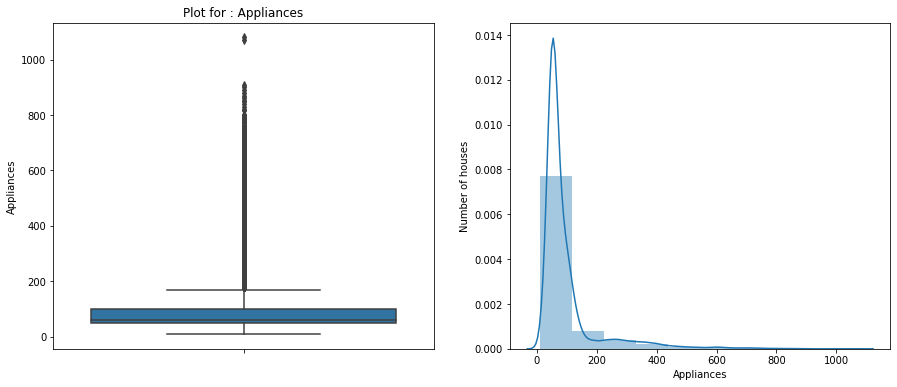

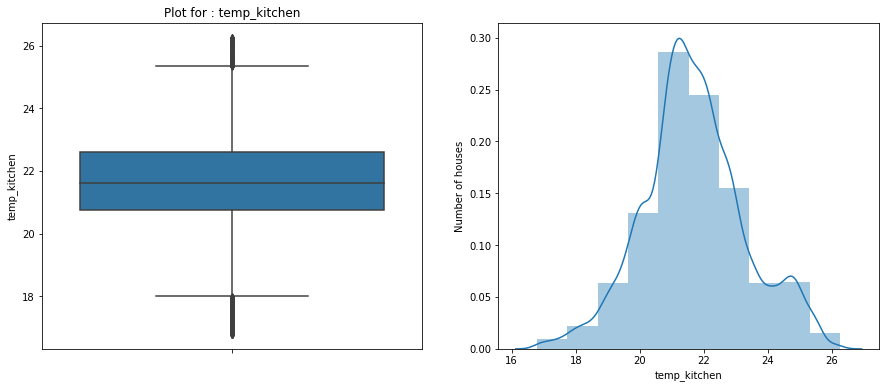

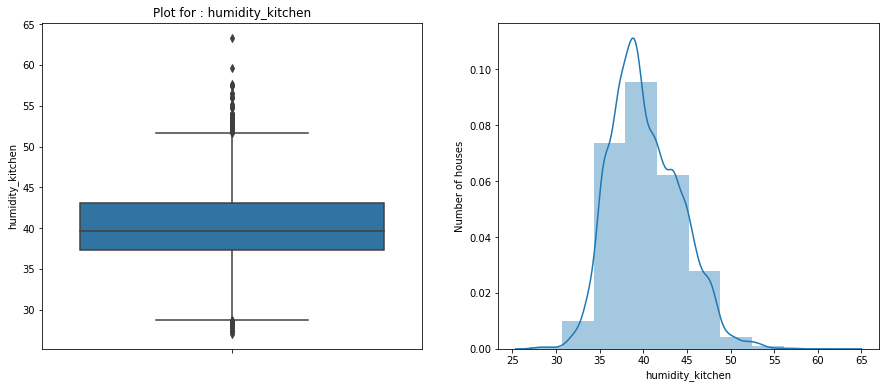

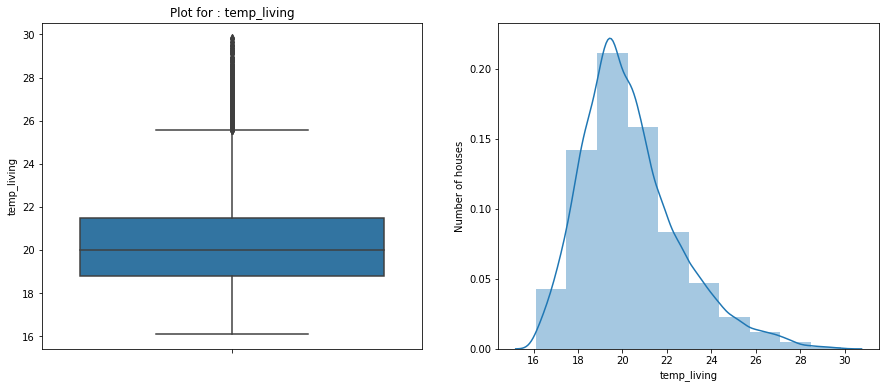

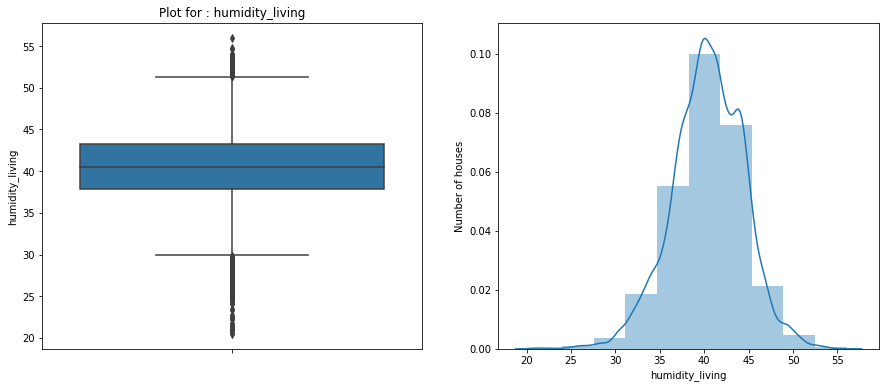

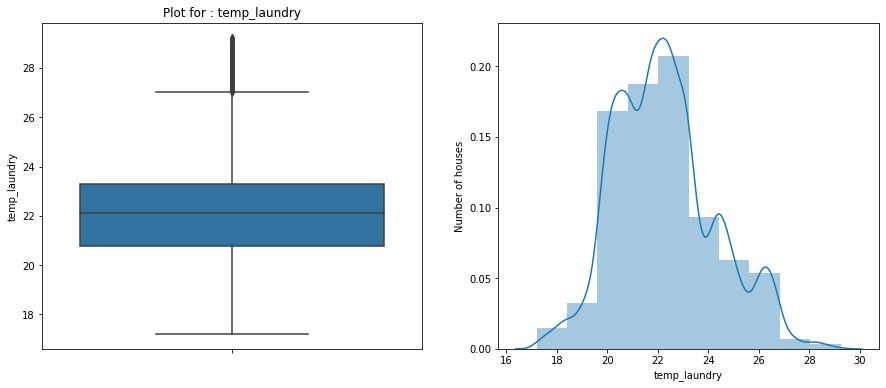

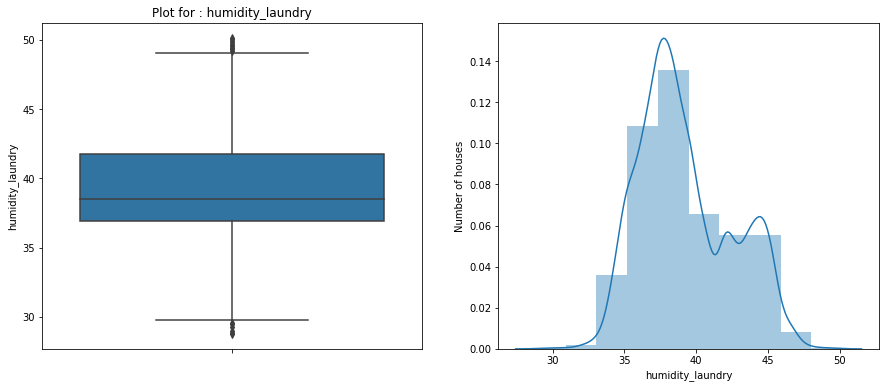

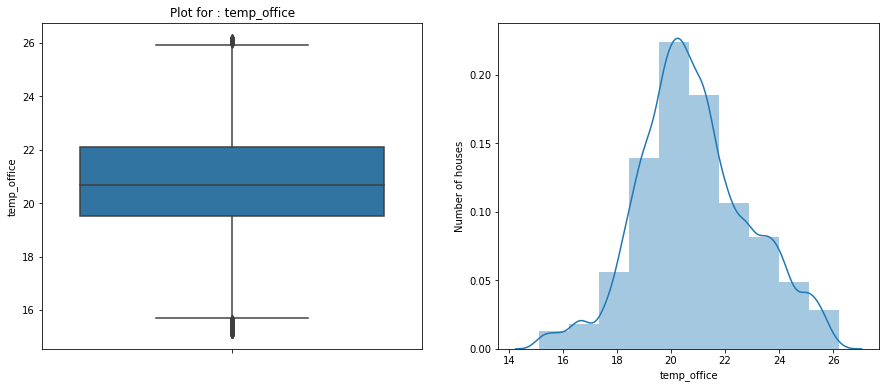

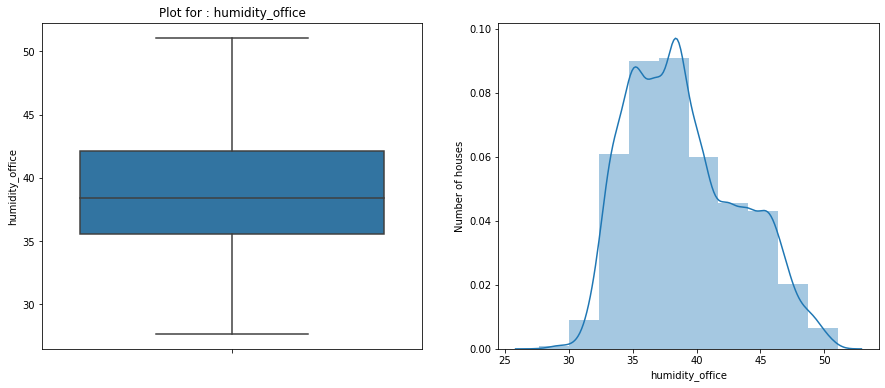

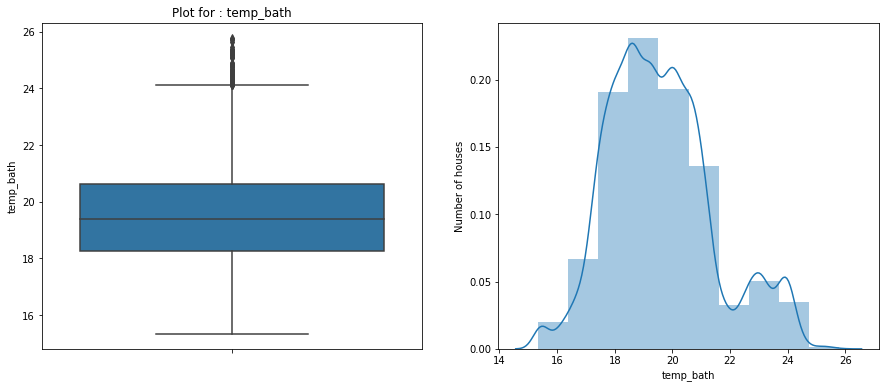

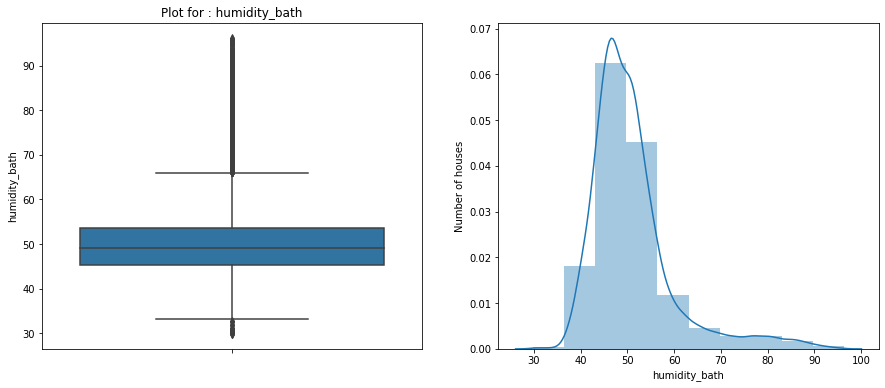

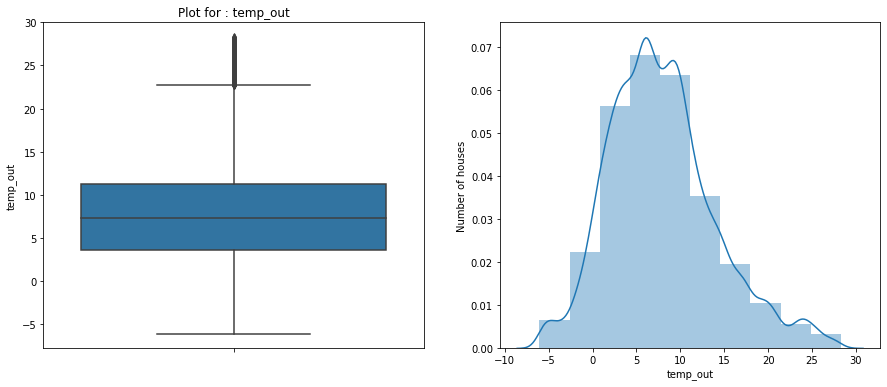

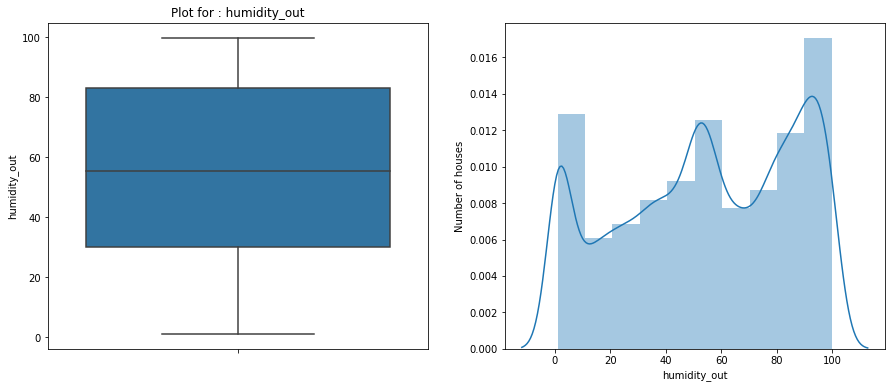

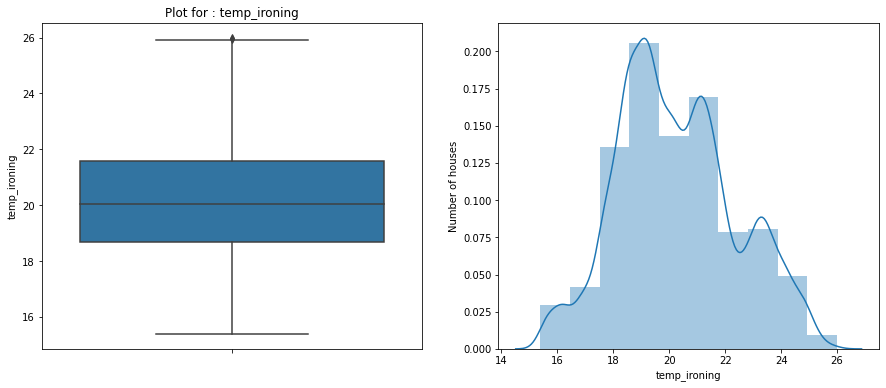

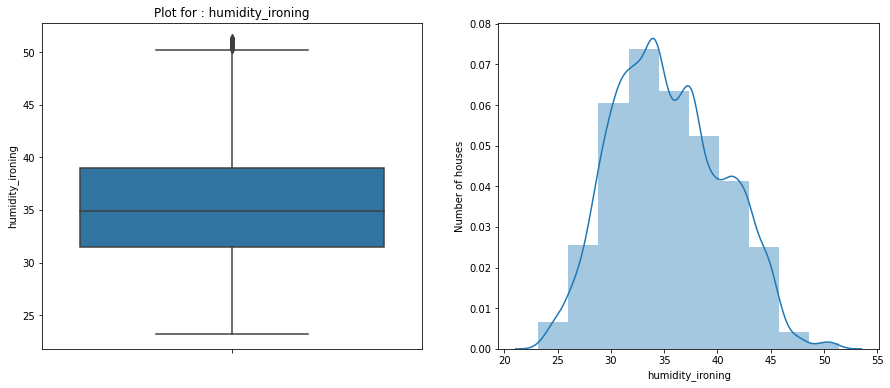

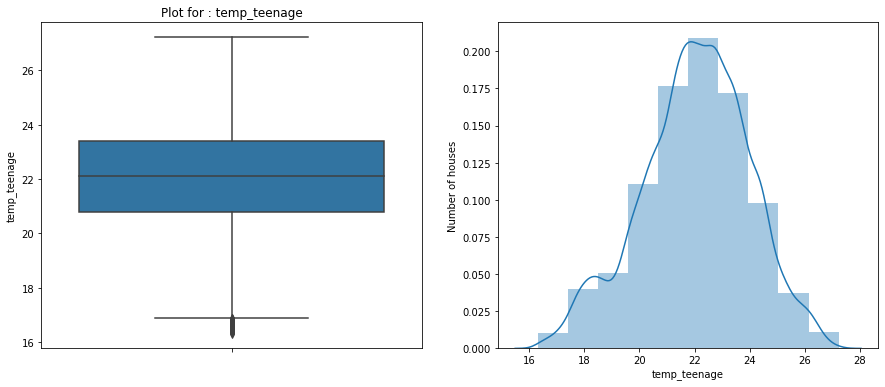

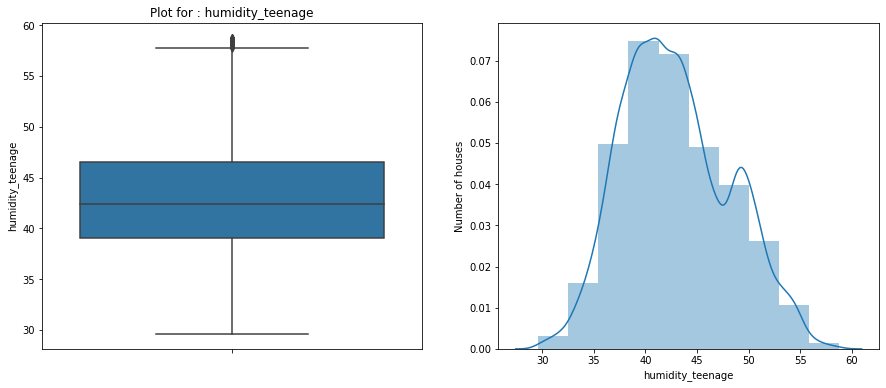

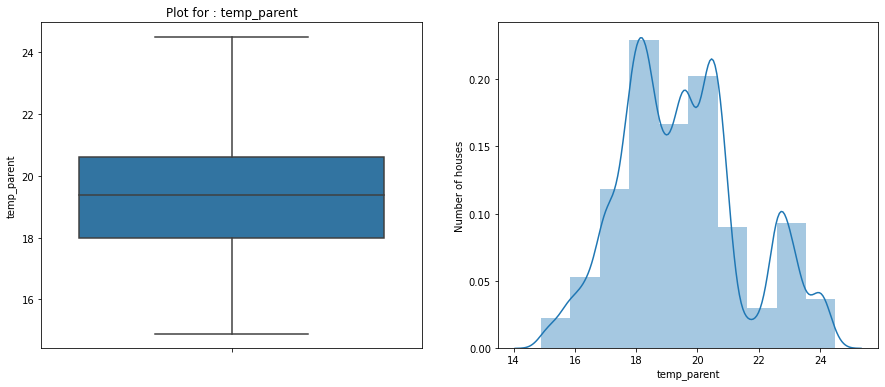

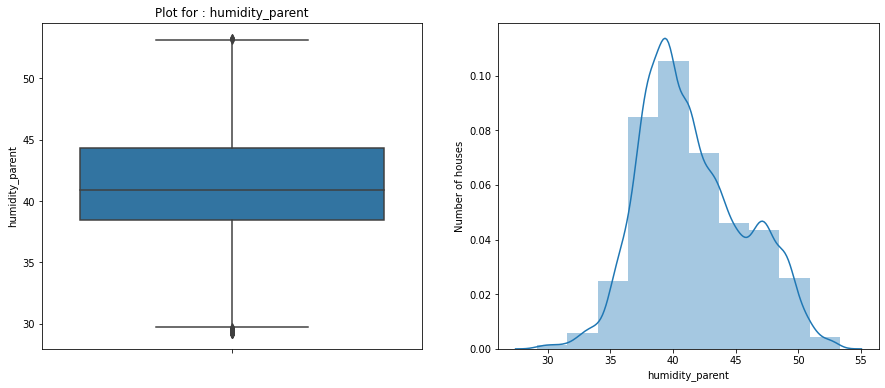

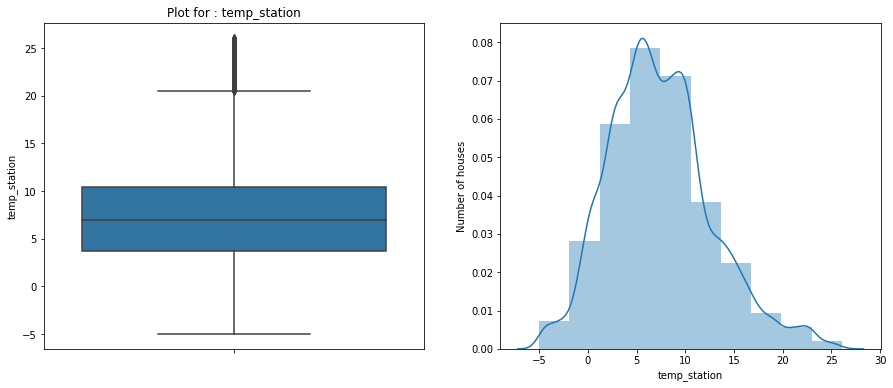

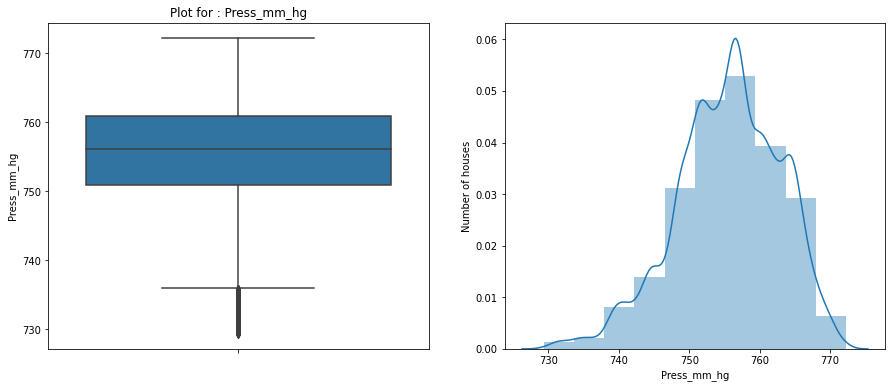

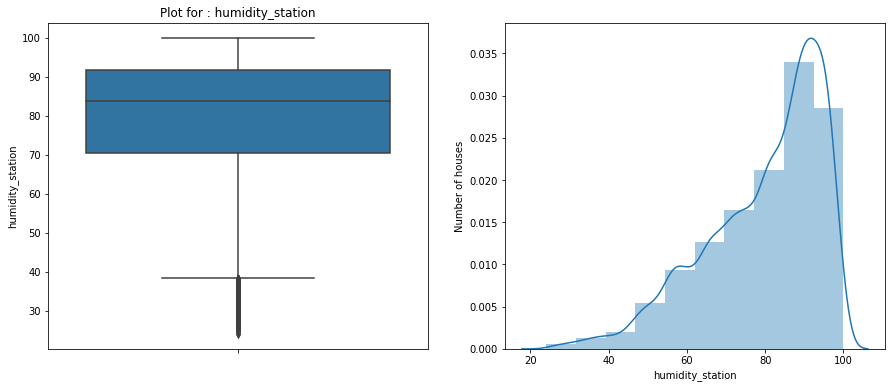

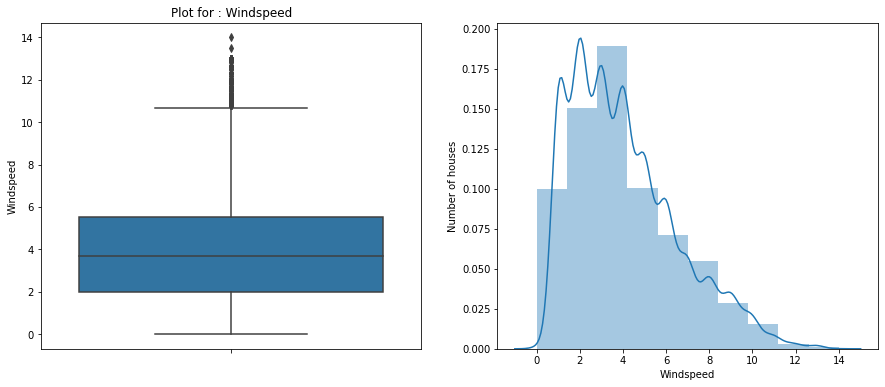

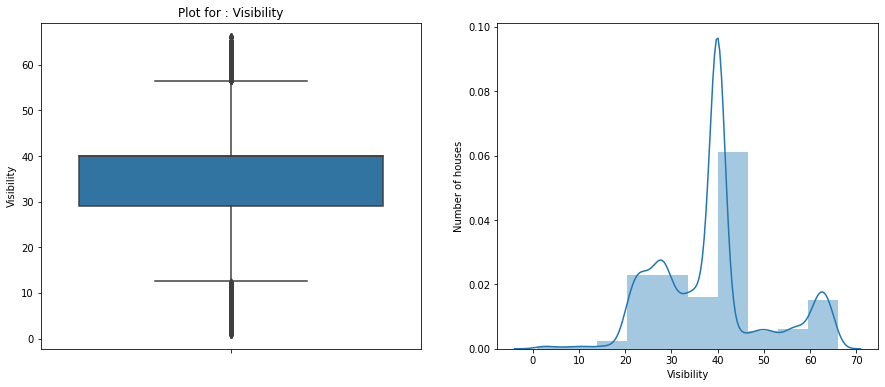

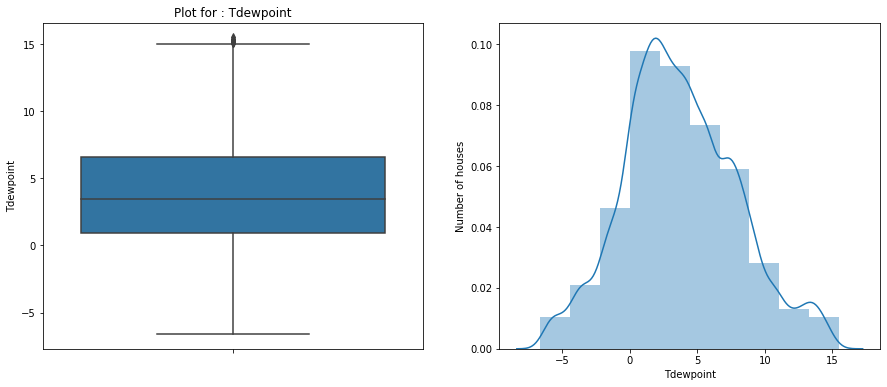

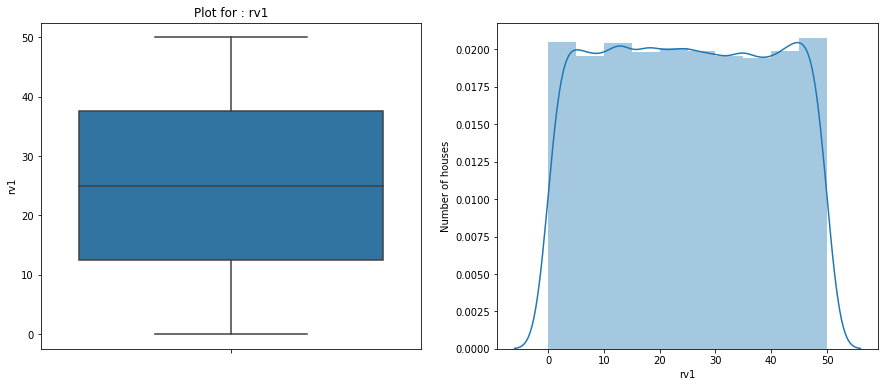

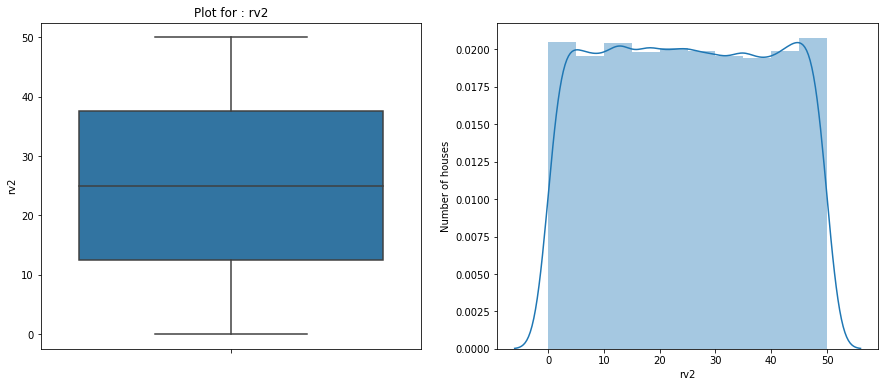

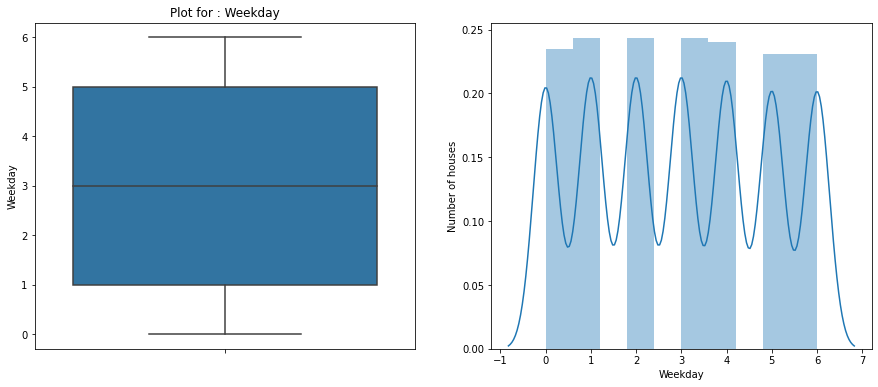

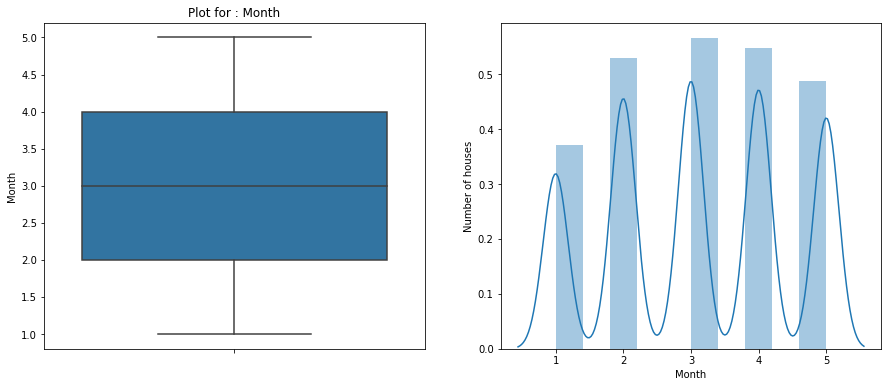

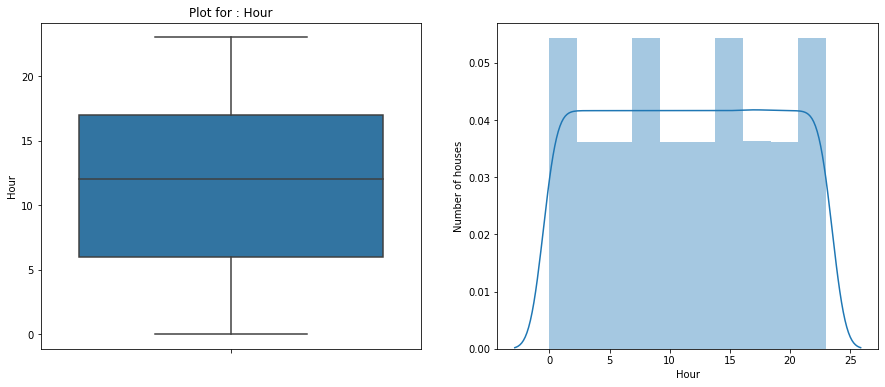

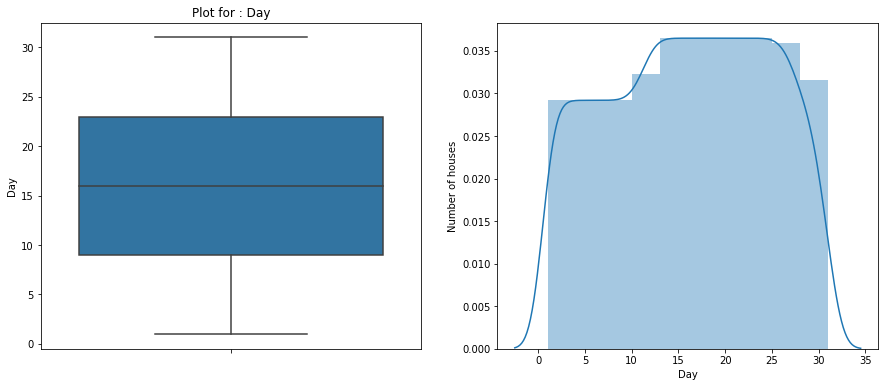

In [ ]:
# Boxplot and Distribution of each feature.
for feature in df.columns[1:]:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[feature])
    fig.set_title(f'Plot for : {feature}')
    fig.set_ylabel(feature)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[feature],bins=10)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(feature)

    plt.show()

* **These Distributions have outliers which will be treated in our next section**

#### **2.3 Bivariate analysis**

**Appliances(Target) column Analysis**

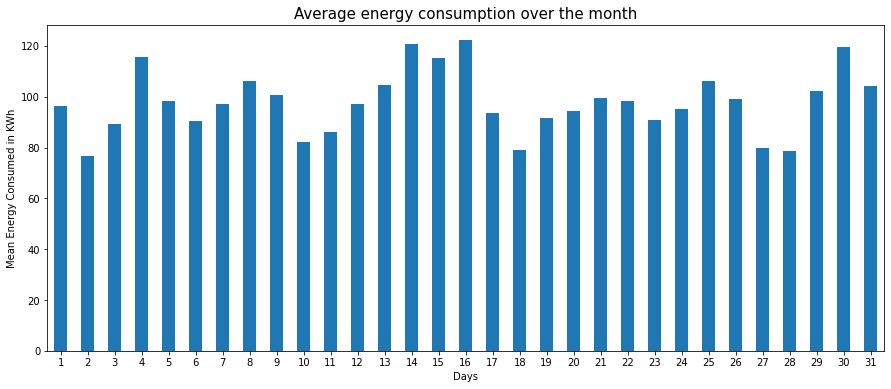

In [ ]:
# Average daily appliance energy consumption
day_consumption=df.groupby(df['date'].dt.day)['Appliances'].mean()
plt.figure(figsize=(15,6))
day_consumption.plot(kind='bar')
plt.title('Average energy consumption over the month',fontsize=15)
plt.xlabel('Days')
plt.ylabel('Mean Energy Consumed in KWh')
plt.xticks(rotation=0)
plt.show()



*  **The average Appliances enrgy consumption is not uniform in a month for 5 months of given Data.**



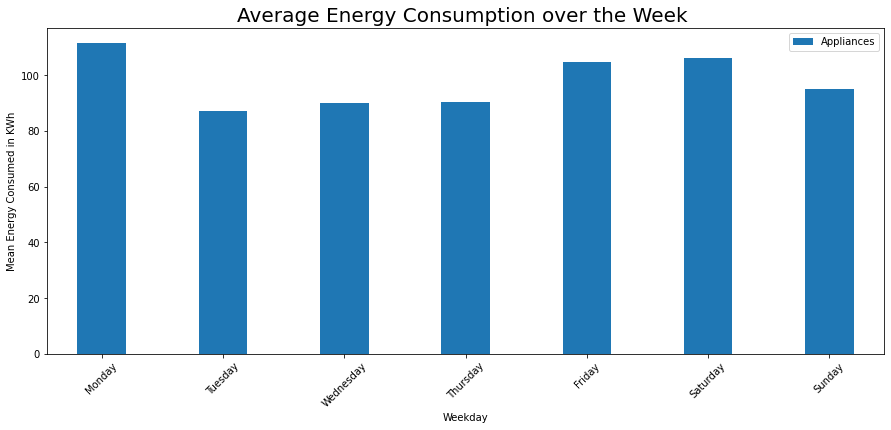

In [ ]:
# Average energy consumption over a week.
df.groupby(['Weekday']).agg({'Appliances':'mean'}).plot(kind='bar',figsize=(15,6),width=0.4)
plt.xticks(rotation = 45, ticks=[0,1,2,3,4,5,6], labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], fontsize = 10)
plt.ylabel('Mean Energy Consumed in KWh')
plt.title('Average Energy Consumption over the Week ',fontdict={'fontsize':20})
plt.show()



*  **We can observe that the Energy Consumption is highest on Monday and compared to other days of the week higher on Fridays and Saturdays.**


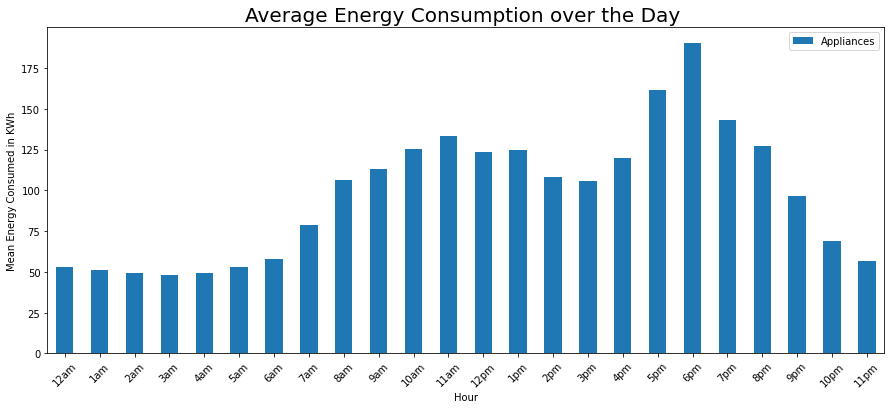

In [ ]:
# Average Energy Consumption over the Day.
df.groupby(['Hour']).agg({'Appliances':'mean'}).plot(kind='bar',figsize=(15,6))
plt.xticks(rotation = 45, ticks=np.arange(0,24), labels = ['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am',
                                                          '12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'], fontsize = 10)
plt.ylabel('Mean Energy Consumed in KWh')
plt.title('Average Energy Consumption over the Day ',fontdict={'fontsize':20})
plt.show()



*   **We can observe that in the evening Energy Consumption is higher compared to any other part of the day.**



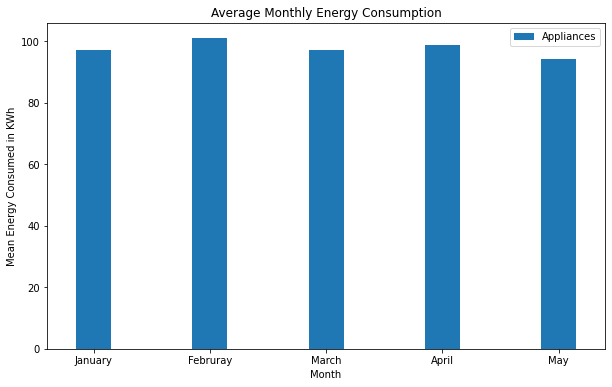

In [ ]:
# Average Monthly Energy Consumption.
df.groupby(['Month']).agg({'Appliances':'mean'}).plot(kind='bar',figsize=(10,6),width=0.3)
plt.xticks(rotation = 0, ticks=[0,1,2,3,4], labels = ['January','Februray','March','April','May'], fontsize = 10)
plt.ylabel('Mean Energy Consumed in KWh')
plt.title('Average Monthly Energy Consumption')
plt.show()



*  **The average Appliances energy consumption is uniform for 5 months of given Data.**



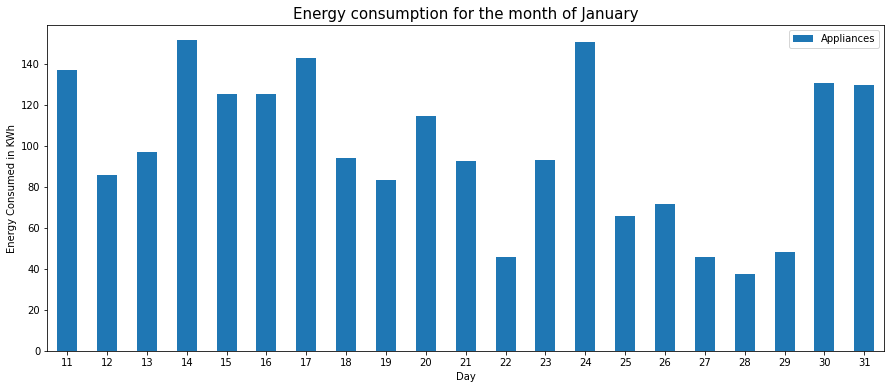

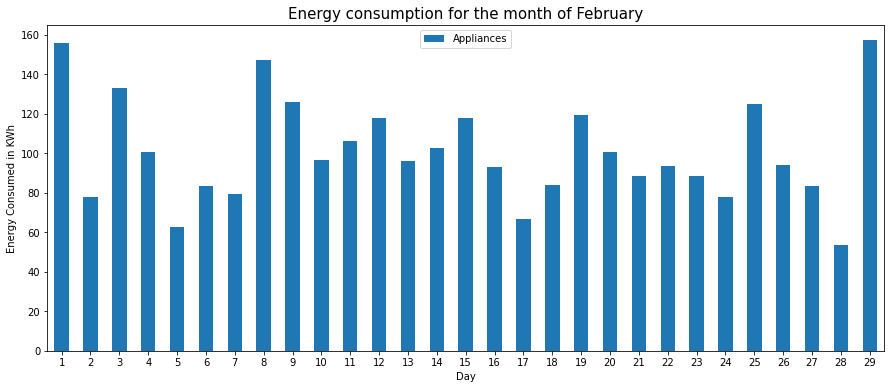

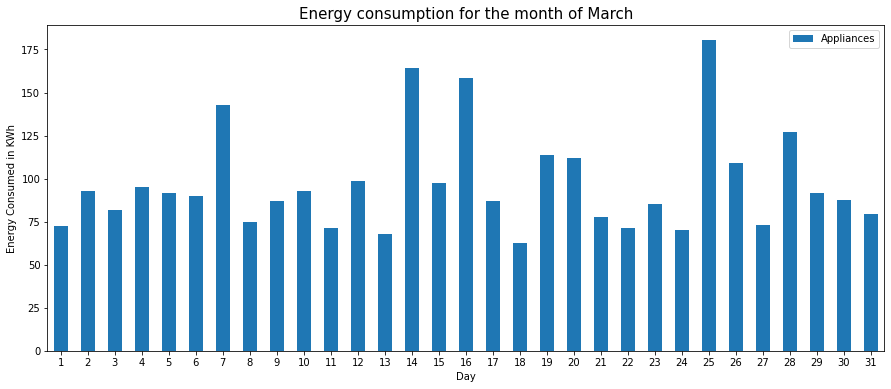

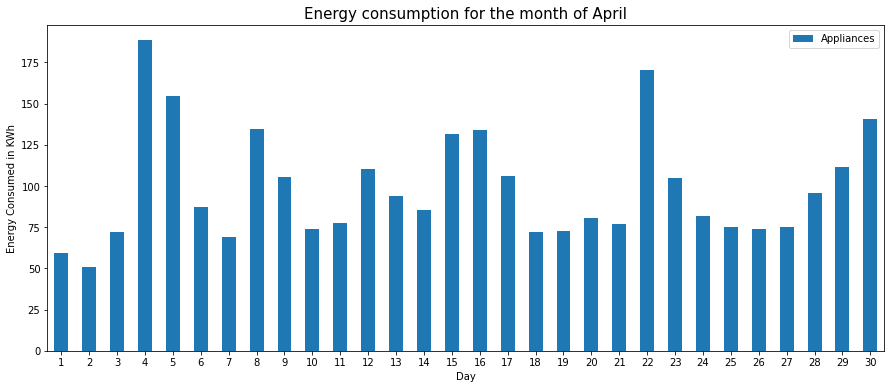

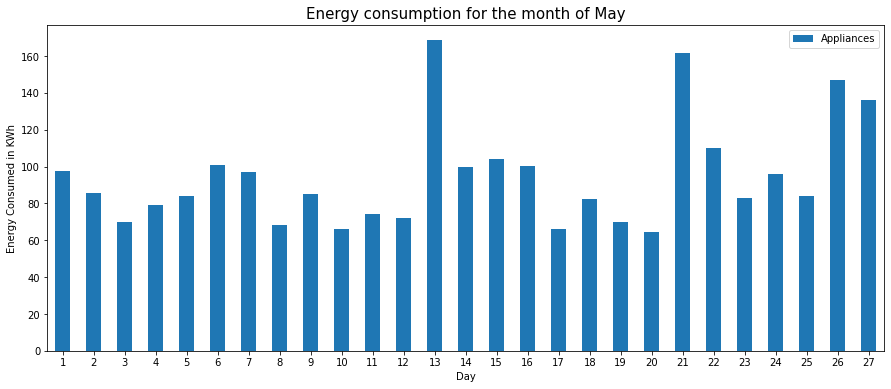

In [ ]:
# Energy consumption for each day per month for 5 months of given Data.
for i in range(1,6):
  df.loc[df['Month']==i,['Appliances','Day']].groupby('Day').agg({'Appliances':'mean'}).plot(kind='bar',figsize=(15,6))
  plt.xticks(rotation = 0)
  plt.ylabel('Energy Consumed in KWh')
  plt.title(f'Energy consumption for the month of {month[i]}',fontdict={'fontsize':15})
  plt.show()



*  **We can observe that Daily Energy Consumption is not uniform over the 5 months.**



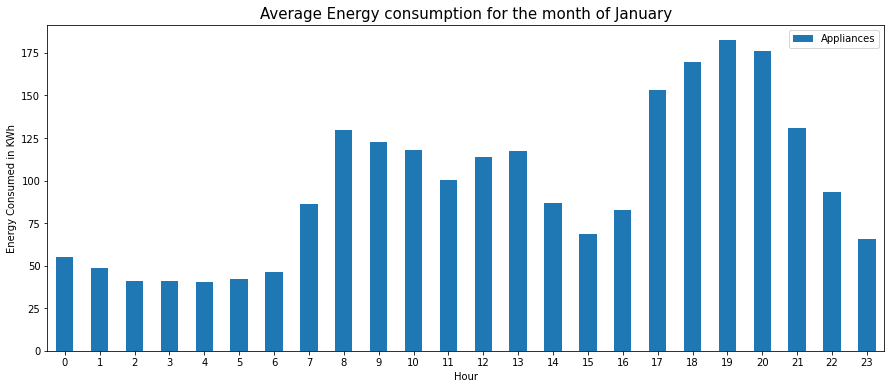

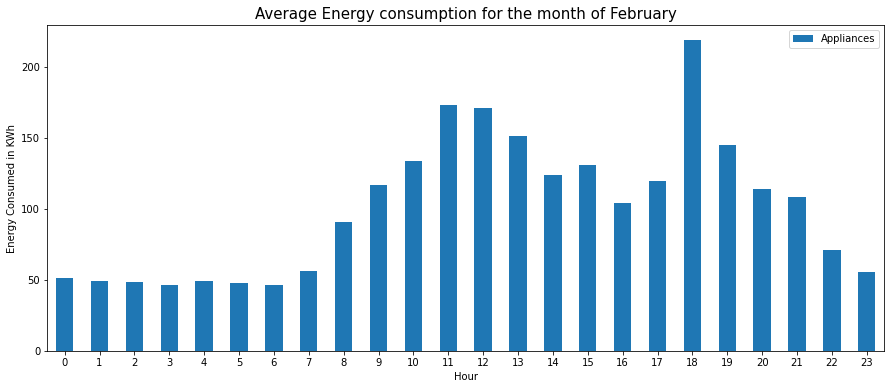

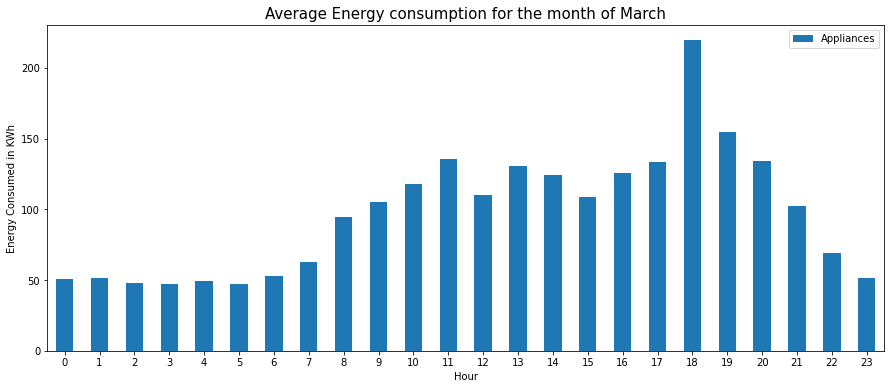

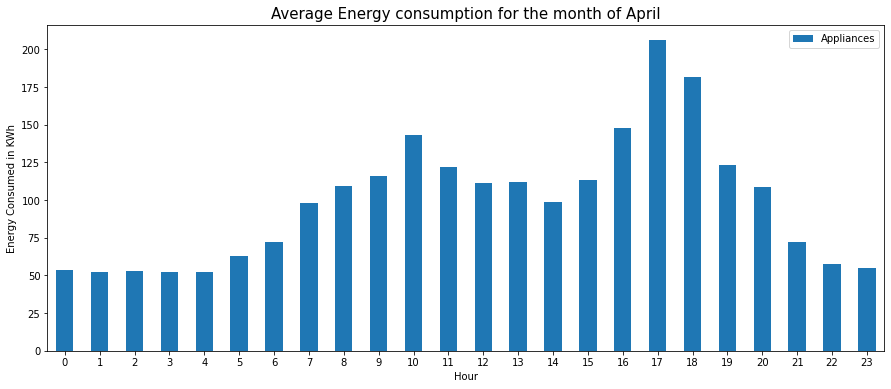

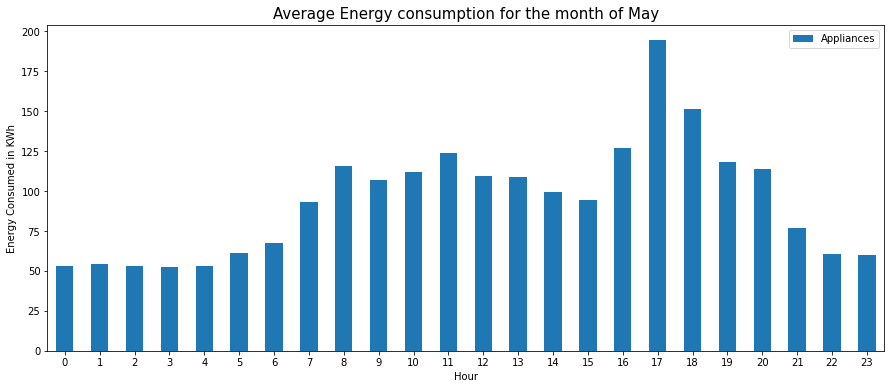

In [ ]:
# Average Energy consumption for each hour per month for 5 months of given Data.
for i in range(1,6):
  df.loc[df['Month']==i,['Appliances','Hour']].groupby('Hour').agg({'Appliances':'mean'}).plot(kind='bar',figsize=(15,6))
  plt.xticks(rotation = 0)
  plt.ylabel('Energy Consumed in KWh')
  plt.title(f'Average Energy consumption for the month of {month[i]}',fontdict={'fontsize':15})
  plt.show()



* **We can observe that Hourly Energy Consumption is not uniform over the 5 months.**



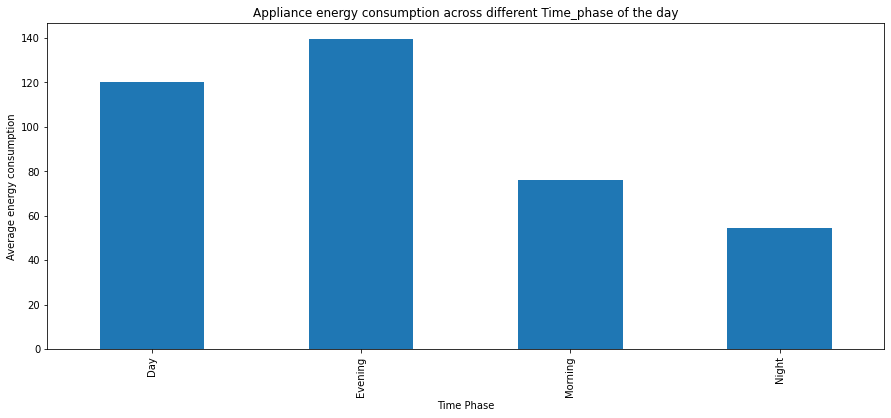

In [ ]:
# Appliance energy consumption across different Time_phase of the day
df1=df.copy()
df1['Time_hour']=df1['date'].dt.hour
#categories of minimum nights column
phase=['Morning','Day','Evening','Night']

conditions=[
            ((df1['Time_hour']>3) & (df1['Time_hour']<=9)),
            ((df1['Time_hour']>9) & (df1['Time_hour']<=15)),
            ((df1['Time_hour']>15) & (df1['Time_hour']<=21)),
            (((df1['Time_hour']>21) & (df1['Time_hour'] <=23)) | ((df1['Time_hour']>=0) & (df1['Time_hour'] <=3)))
            ]

# creating a new column time_intetestt in the dataframe according to the conditions
df1['Time_phase'] = np.select(conditions, phase)


#Appliance Energy consumption across different time_phase in a day

phase_consumption=df1.groupby('Time_phase')['Appliances'].mean()
plt.figure(figsize=(15,6))
phase_consumption.plot(kind='bar',width=0.5)
plt.title('Appliance energy consumption across different Time_phase of the day')
plt.xlabel('Time Phase')
plt.ylabel('Average energy consumption')
plt.show()



* **We can observe that the Energy Consumption is higher in the Evening compared to any other part of the day.**



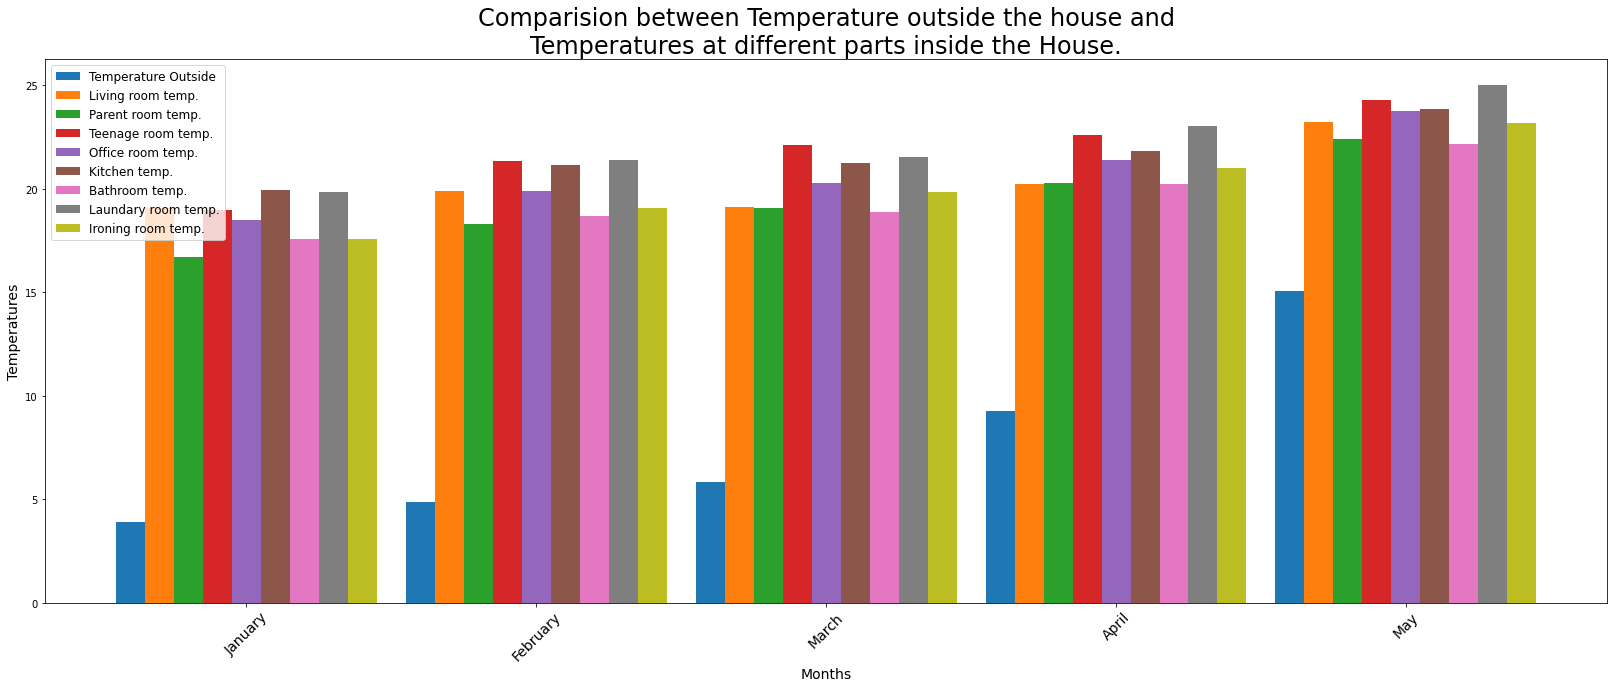

In [ ]:
# Comparision between Temperature outside the house and Temperatures at different parts inside the House.
plt.rcParams['figure.figsize'] = (28, 10)
x_axis = np.arange(5)
plt.subplot()
plt.bar(x_axis - 0.40, df.groupby(df['date'].dt.month).aggregate({'temp_out' : 'mean'})['temp_out'], width = 0.10, label = 'Temperature Outside')
plt.bar(x_axis - 0.30, df.groupby(df['date'].dt.month).aggregate({'temp_living' : 'mean'})['temp_living'], width = 0.10, label = 'Living room temp.')
plt.bar(x_axis - 0.20, df.groupby(df['date'].dt.month).aggregate({'temp_parent' : 'mean'})['temp_parent'], width = 0.10, label = 'Parent room temp.')
plt.bar(x_axis - 0.10, df.groupby(df['date'].dt.month).aggregate({'temp_teenage' : 'mean'})['temp_teenage'], width = 0.10, label = 'Teenage room temp.')
plt.bar(x_axis, df.groupby(df['date'].dt.month).aggregate({'temp_office' : 'mean'})['temp_office'], width = 0.10, label = 'Office room temp.')
plt.bar(x_axis + 0.10, df.groupby(df['date'].dt.month).aggregate({'temp_kitchen' : 'mean'})['temp_kitchen'], width = 0.10, label = 'Kitchen temp.')
plt.bar(x_axis + 0.20, df.groupby(df['date'].dt.month).aggregate({'temp_bath' : 'mean'})['temp_bath'], width = 0.10, label = 'Bathroom temp.')
plt.bar(x_axis + 0.30, df.groupby(df['date'].dt.month).aggregate({'temp_laundry' : 'mean'})['temp_laundry'], width = 0.10, label = 'Laundary room temp.')
plt.bar(x_axis + 0.40, df.groupby(df['date'].dt.month).aggregate({'temp_ironing' : 'mean'})['temp_ironing'], width = 0.10, label = 'Ironing room temp.')
plt.xticks(rotation = 45, ticks=[0,1,2,3,4], labels = ['January','February','March','April','May'], fontsize = 14)
plt.yticks(fontsize = 10)
plt.legend(prop = {'size' : 12})
plt.title('Comparision between Temperature outside the house and\nTemperatures at different parts inside the House.', fontsize = 24)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Temperatures', fontsize = 14)
plt.show()



* **We can observe that the tempertures both outside and inside the House are increasing over months.**



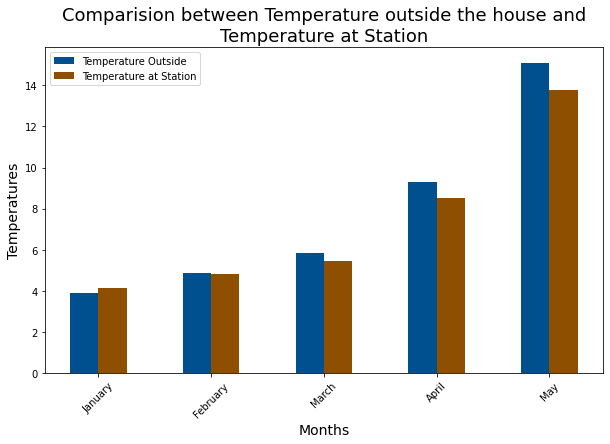

In [ ]:
#Temperature outside VS Temperature at Station
plt.rcParams['figure.figsize'] = (10, 6)
x_axis = np.arange(5)
plt.subplot()
plt.bar(x_axis - 0.125, df.groupby(df['date'].dt.month).aggregate({'temp_out' : 'mean'})['temp_out'], width = 0.25, label = 'Temperature Outside', color = '#004f8f')
plt.bar(x_axis + 0.125, df.groupby(df['date'].dt.month).aggregate({'temp_station' : 'mean'})['temp_station'], width = 0.25, label = 'Temperature at Station', color = '#8f4f00')
plt.xticks(rotation = 45, ticks=[0,1,2,3,4], labels = ['January','February','March','April','May'], fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(prop = {'size' : 10})
plt.title('Comparision between Temperature outside the house and\nTemperature at Station', fontsize = 18)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Temperatures', fontsize = 14)
plt.show()




* **Overall temperature is increasing over the months.**
* **There's an increase in the difference between Outside Temperature and Temperature at the station over the months.**



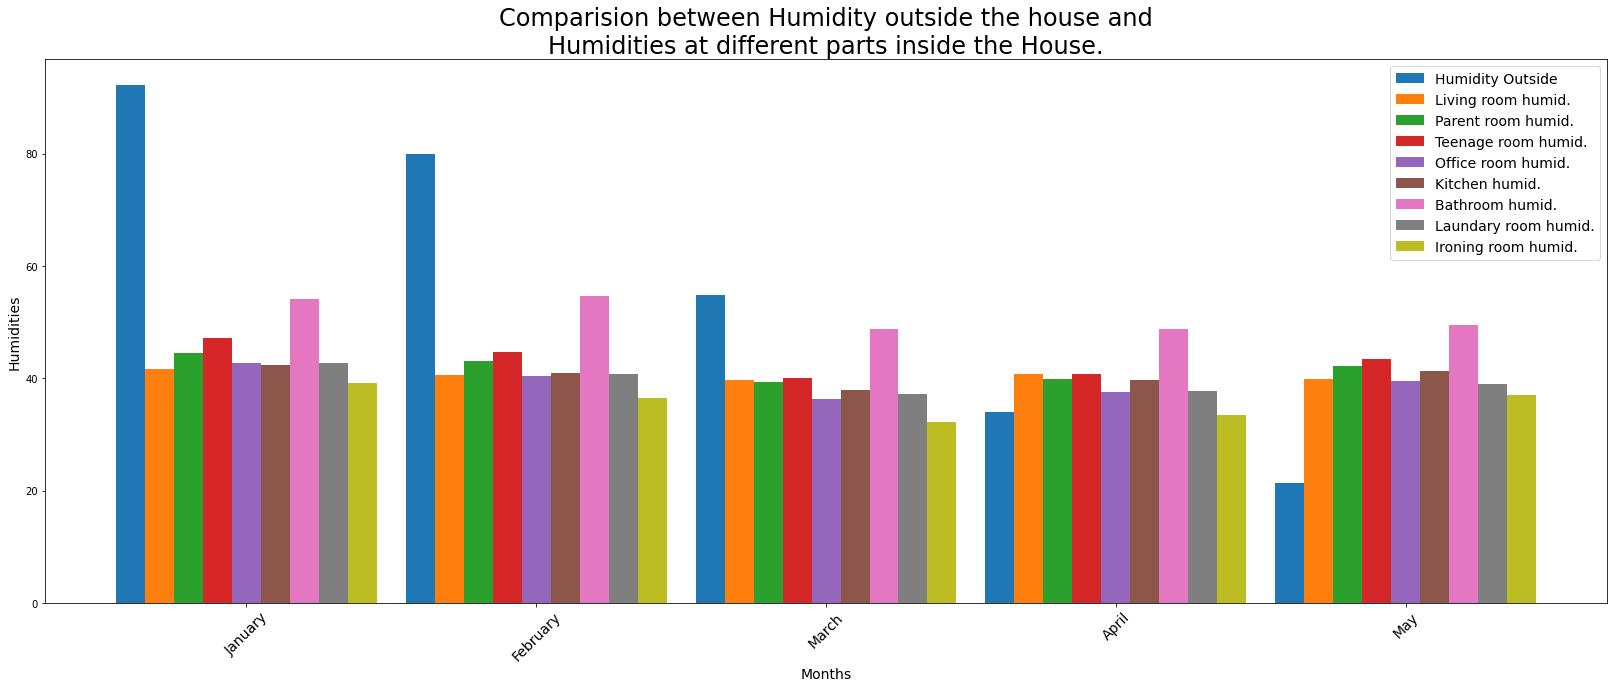

In [ ]:
# Comparision between Humidity outside the house and Humidities at different parts inside the House.
plt.rcParams['figure.figsize'] = (28, 10)
x_axis = np.arange(5)
plt.subplot()
plt.bar(x_axis - 0.40, df.groupby(df['date'].dt.month).aggregate({'humidity_out' : 'mean'})['humidity_out'], width = 0.10, label = 'Humidity Outside')
plt.bar(x_axis - 0.30, df.groupby(df['date'].dt.month).aggregate({'humidity_living' : 'mean'})['humidity_living'], width = 0.10, label = 'Living room humid.')
plt.bar(x_axis - 0.20, df.groupby(df['date'].dt.month).aggregate({'humidity_parent' : 'mean'})['humidity_parent'], width = 0.10, label = 'Parent room humid.')
plt.bar(x_axis - 0.10, df.groupby(df['date'].dt.month).aggregate({'humidity_teenage' : 'mean'})['humidity_teenage'], width = 0.10, label = 'Teenage room humid.')
plt.bar(x_axis, df.groupby(df['date'].dt.month).aggregate({'humidity_office' : 'mean'})['humidity_office'], width = 0.10, label = 'Office room humid.')
plt.bar(x_axis + 0.10, df.groupby(df['date'].dt.month).aggregate({'humidity_kitchen' : 'mean'})['humidity_kitchen'], width = 0.10, label = 'Kitchen humid.')
plt.bar(x_axis + 0.20, df.groupby(df['date'].dt.month).aggregate({'humidity_bath' : 'mean'})['humidity_bath'], width = 0.10, label = 'Bathroom humid.')
plt.bar(x_axis + 0.30, df.groupby(df['date'].dt.month).aggregate({'humidity_laundry' : 'mean'})['humidity_laundry'], width = 0.10, label = 'Laundary room humid.')
plt.bar(x_axis + 0.40, df.groupby(df['date'].dt.month).aggregate({'humidity_ironing' : 'mean'})['humidity_ironing'], width = 0.10, label = 'Ironing room humid.')
plt.xticks(rotation = 45, ticks=[0,1,2,3,4], labels = ['January','February','March','April','May'], fontsize = 14)
plt.yticks(fontsize = 10)
plt.legend(prop = {'size' : 14})
plt.title('Comparision between Humidity outside the house and\nHumidities at different parts inside the House.', fontsize = 24)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Humidities', fontsize = 14)
plt.show()

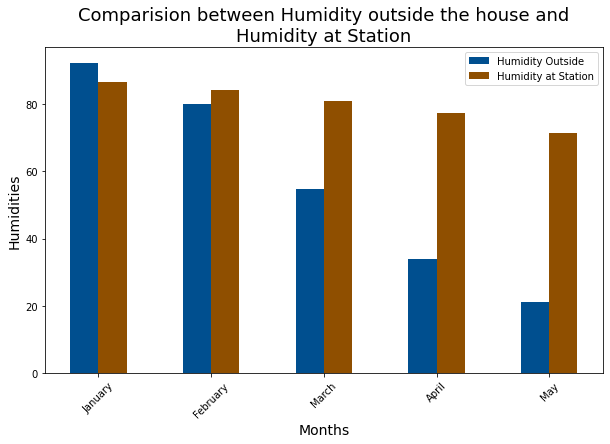

In [ ]:
#Humidity outside VS Humidity at Station
plt.rcParams['figure.figsize'] = (10, 6)
x_axis = np.arange(5)
plt.subplot()
plt.bar(x_axis - 0.125, df.groupby(df['date'].dt.month).aggregate({'humidity_out' : 'mean'})['humidity_out'], width = 0.25, label = 'Humidity Outside', color = '#004f8f')
plt.bar(x_axis + 0.125, df.groupby(df['date'].dt.month).aggregate({'humidity_station' : 'mean'})['humidity_station'], width = 0.25, label = 'Humidity at Station', color = '#8f4f00')
plt.xticks(rotation = 45, ticks=[0,1,2,3,4], labels = ['January','February','March','April','May'], fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(prop = {'size' : 10})
plt.title('Comparision between Humidity outside the house and\nHumidity at Station', fontsize = 18)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Humidities', fontsize = 14)
plt.show()

In [ ]:
features = df.columns[2:]
print(features)

Index(['temp_kitchen', 'humidity_kitchen', 'temp_living', 'humidity_living',
       'temp_laundry', 'humidity_laundry', 'temp_office', 'humidity_office',
       'temp_bath', 'humidity_bath', 'temp_out', 'humidity_out',
       'temp_ironing', 'humidity_ironing', 'temp_teenage', 'humidity_teenage',
       'temp_parent', 'humidity_parent', 'temp_station', 'Press_mm_hg',
       'humidity_station', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'Weekday', 'Month', 'Hour', 'Day'],
      dtype='object')


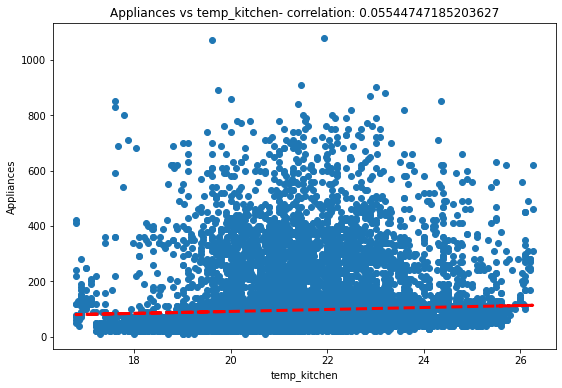

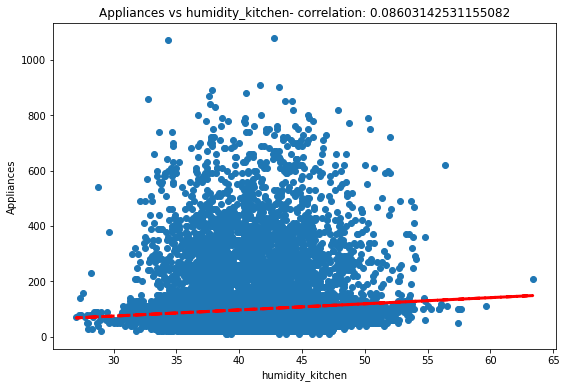

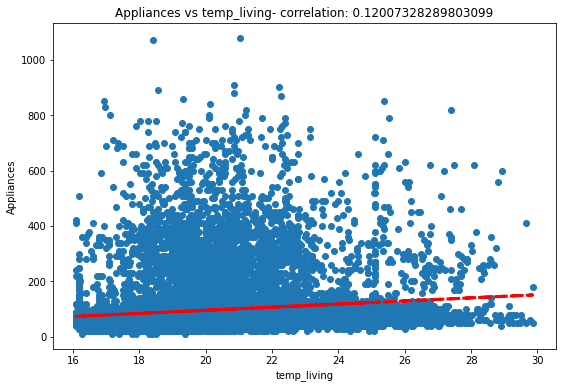

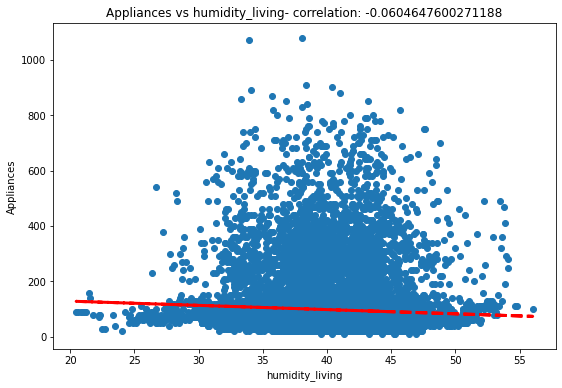

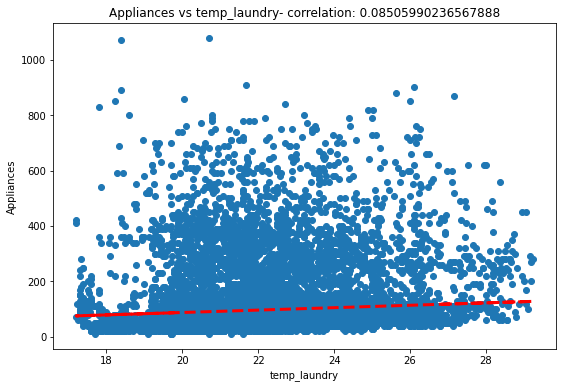

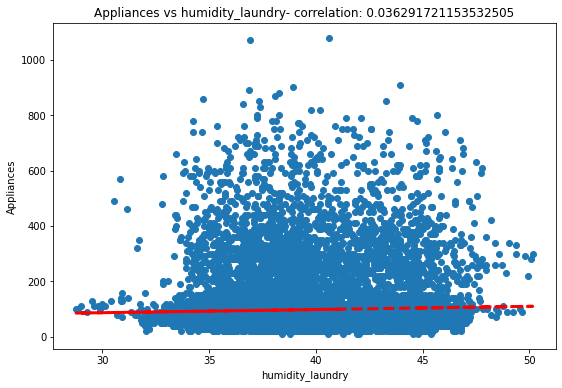

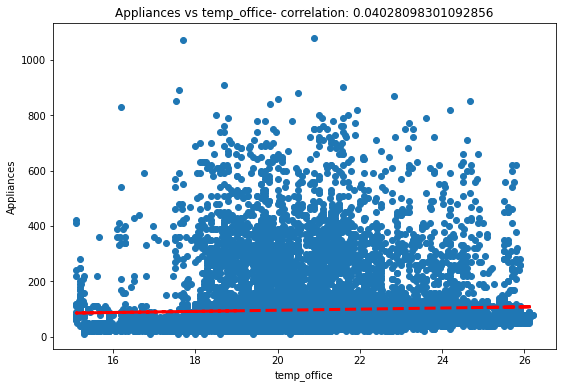

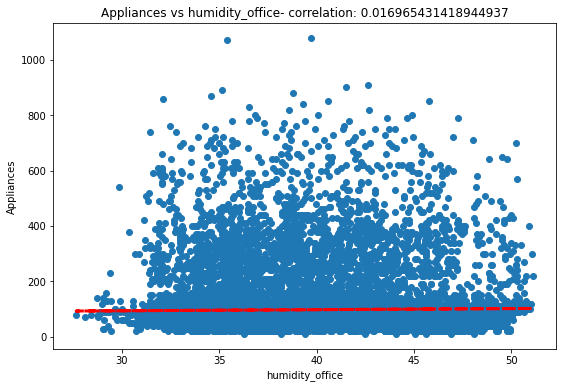

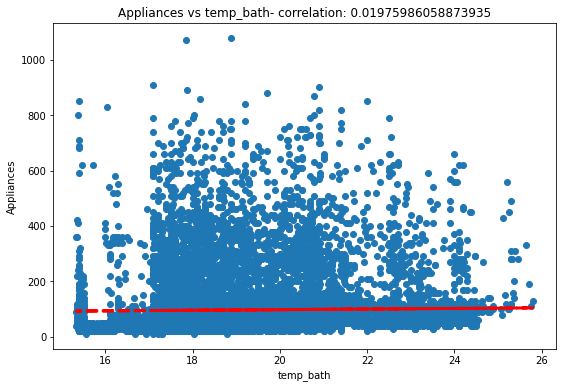

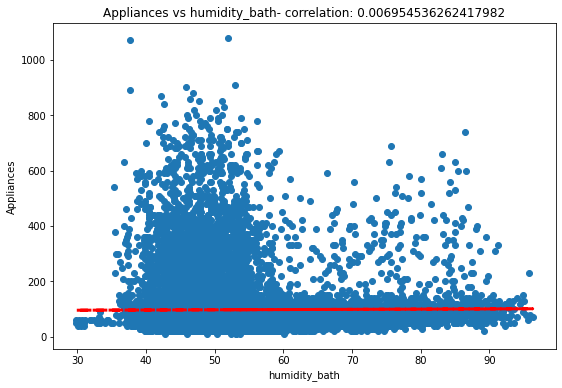

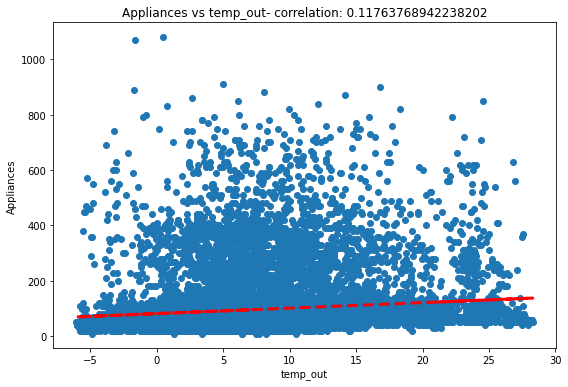

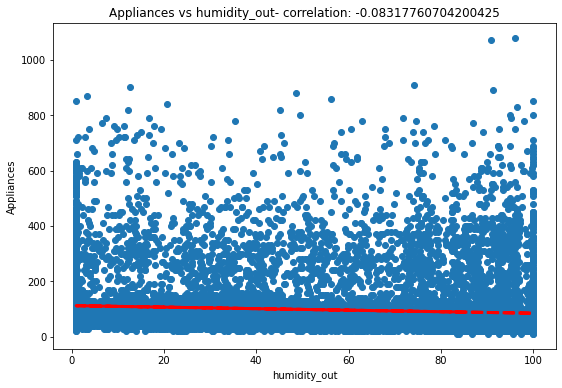

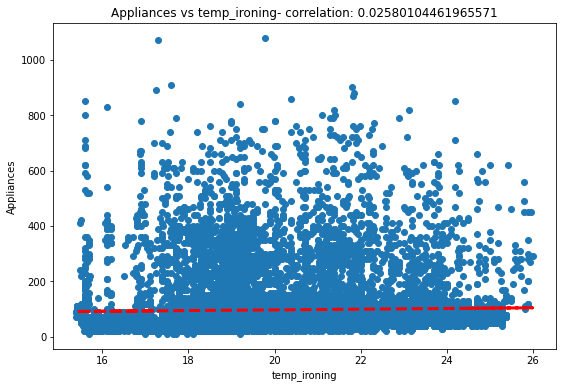

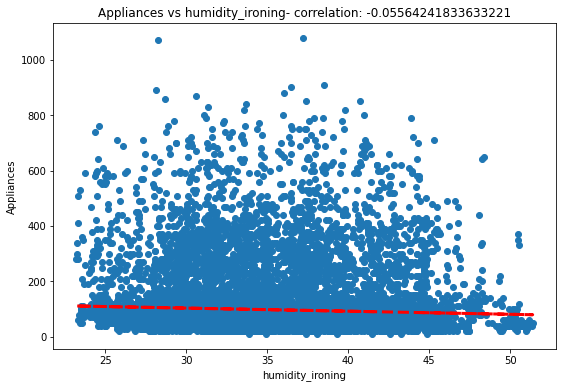

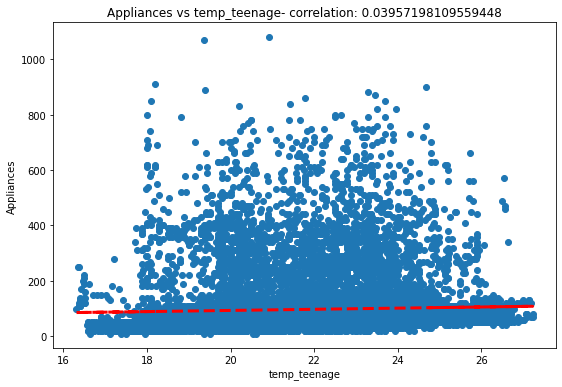

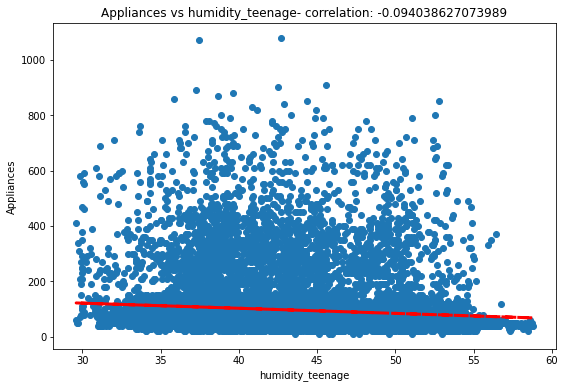

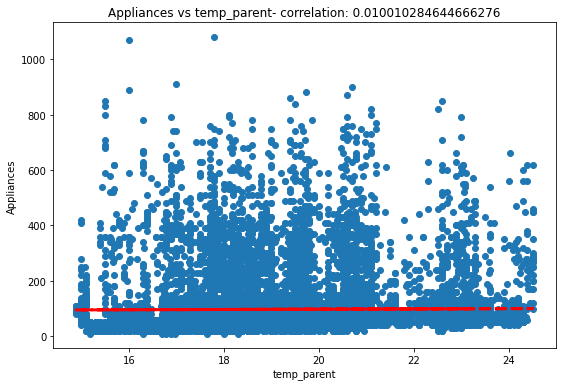

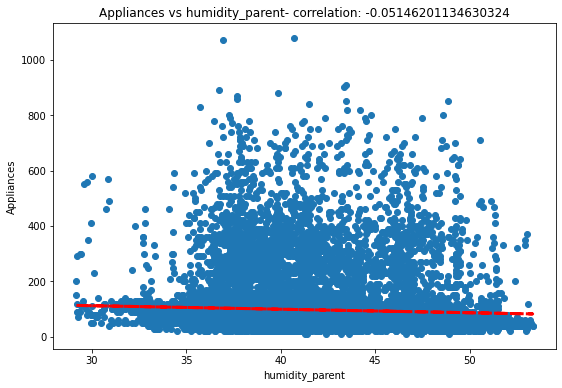

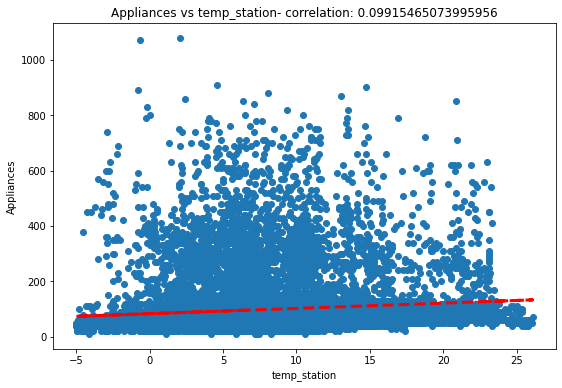

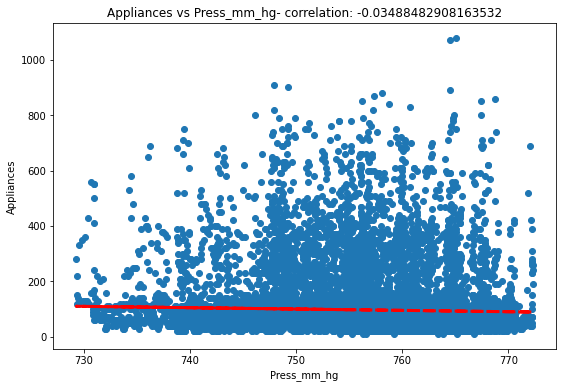

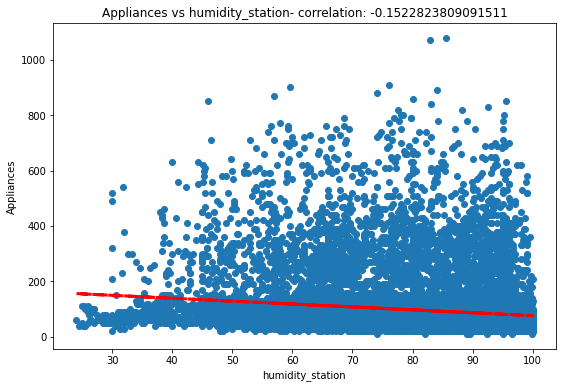

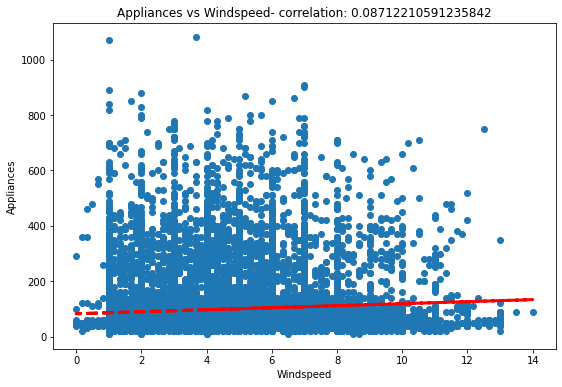

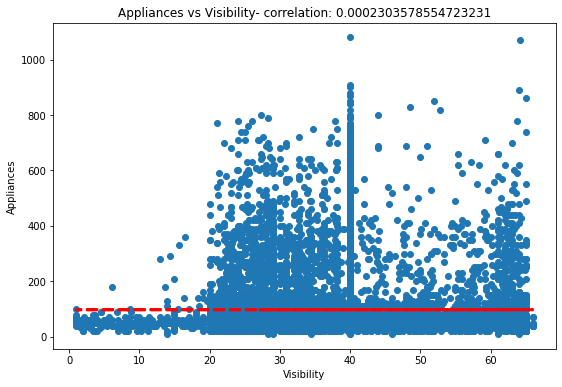

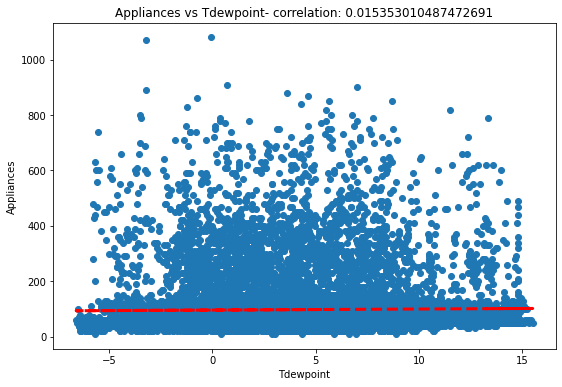

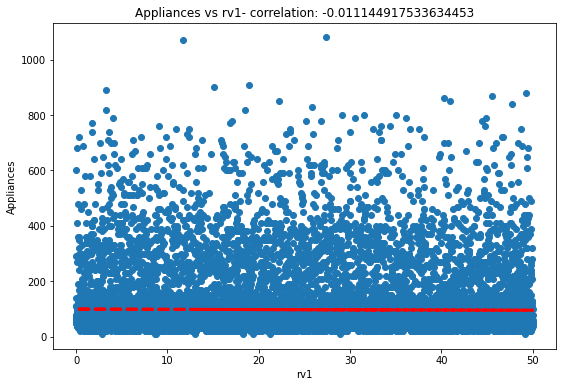

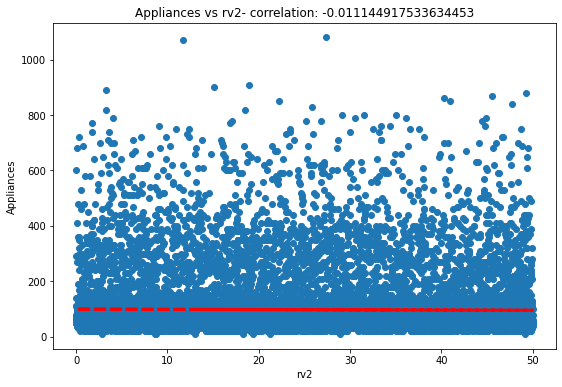

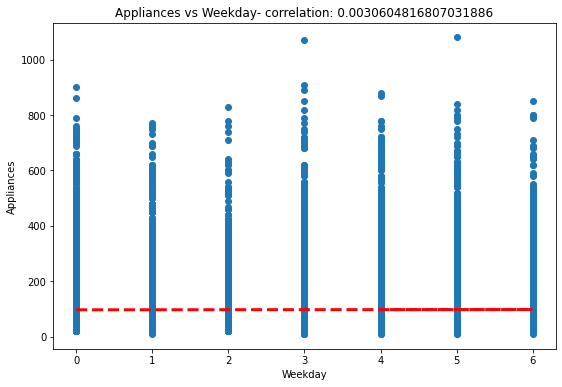

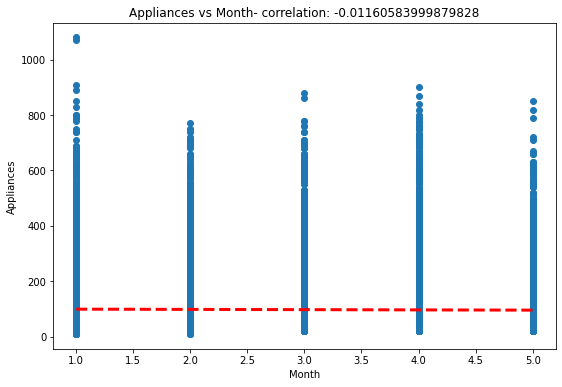

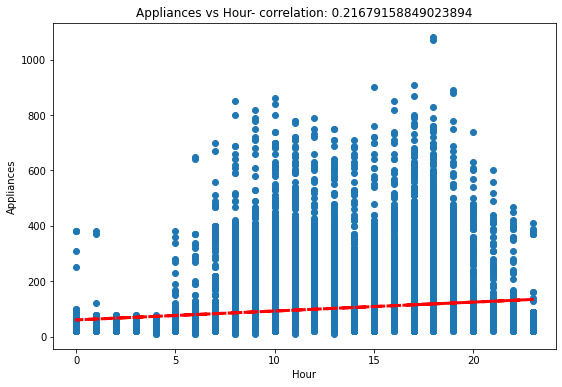

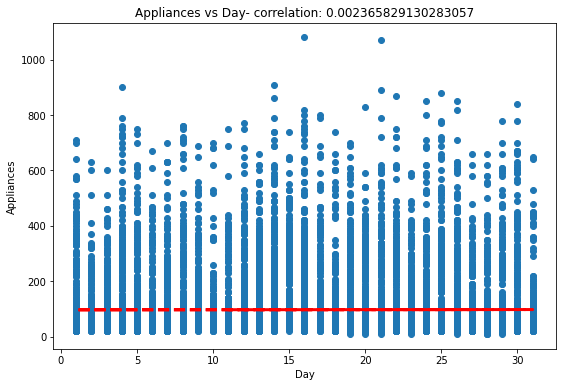

In [ ]:
for col in features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Appliances'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=3)

plt.show()



* **We can observe that there's not much of a linear relationship between any feature and the target variable.**



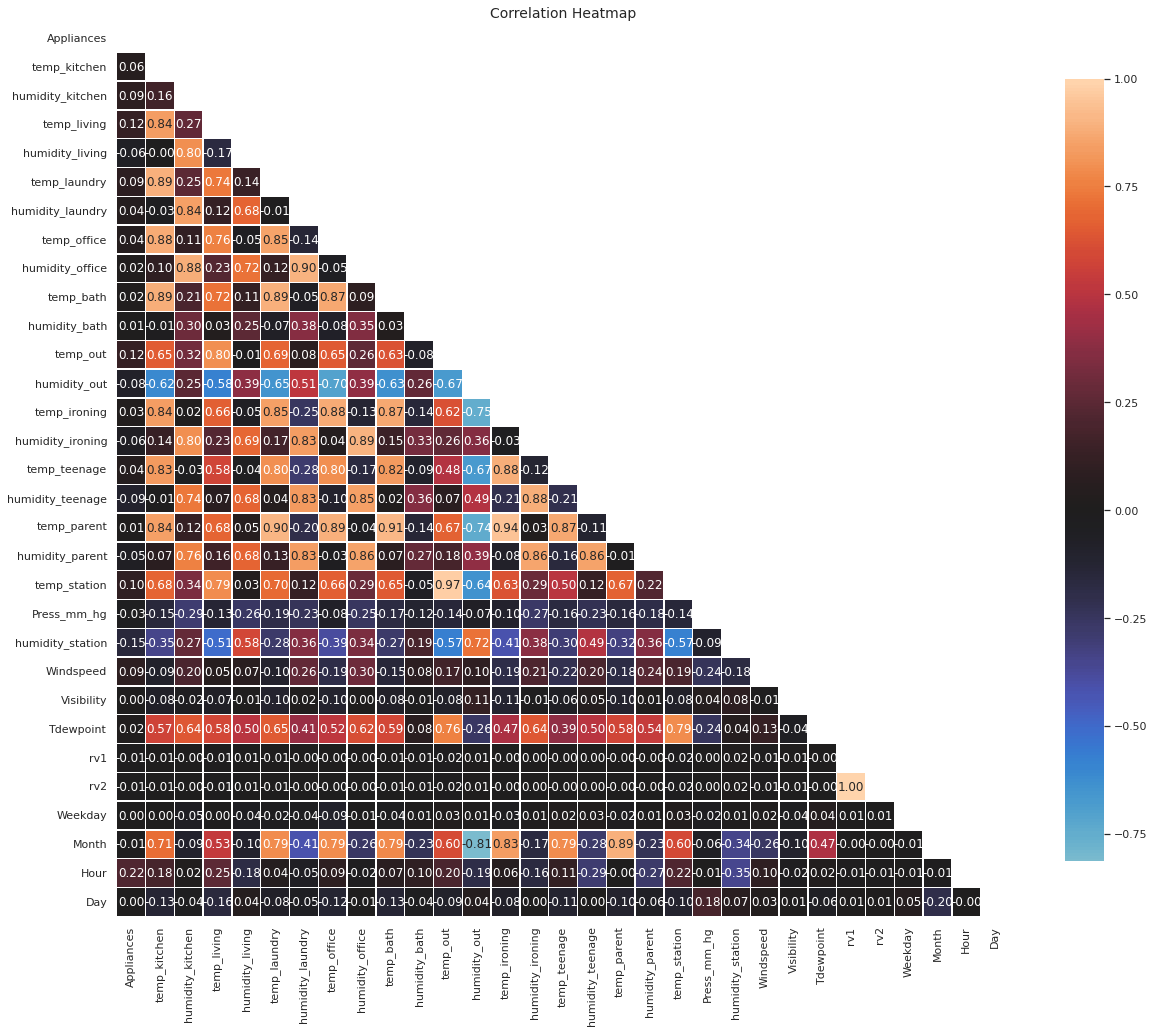

In [ ]:
# Correlation plot for our Dataset.
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,18))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,annot=True,mask=mask,fmt=".2f", vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink":0.8})
plt.title('Correlation Heatmap', fontsize = 14)
plt.show()

* The Target variable 'Appliances' don't have a good correlation of any of features column
* The columns'rv1' and 'visiblity' have very low correlation with other variables
* The temperature variables have a good postive correation among themselves.


### **3. Modelling**

In [ ]:
df.head()

date  Appliances  temp_kitchen  humidity_kitchen  \
0 2016-01-11 17:00:00          60         19.89         47.596667   
1 2016-01-11 17:10:00          60         19.89         46.693333   
2 2016-01-11 17:20:00          50         19.89         46.300000   
3 2016-01-11 17:30:00          50         19.89         46.066667   
4 2016-01-11 17:40:00          60         19.89         46.333333   

   temp_living  humidity_living  temp_laundry  humidity_laundry  temp_office  \
0         19.2        44.790000         19.79         44.730000    19.000000   
1         19.2        44.722500         19.79         44.790000    19.000000   
2         19.2        44.626667         19.79         44.933333    18.926667   
3         19.2        44.590000         19.79         45.000000    18.890000   
4         19.2        44.530000         19.79         45.000000    18.890000   

   humidity_office  temp_bath  humidity_bath  temp_out  humidity_out  \
0        45.566667  17.166667          55.20  7.026667     84.256667   
1        45.992500  17.166667          55.20  6.833333     84.063333   
2        45.890000  17.166667          55.09  6.560000     83.156667   
3        45.723333  17.166667          55.09  6.433333     83.423333   
4        45.530000  17.200000          55.09  6.366667     84.893333   

   temp_ironing  humidity_ironing  temp_teenage  humidity_teenage  \
0     17.200000         41.626667          18.2         48.900000   
1     17.200000         41.560000          18.2         48.863333   
2     17.200000         41.433333          18.2         48.730000   
3     17.133333         41.290000          18.1         48.590000   
4     17.200000         41.230000          18.1         48.590000   

   temp_parent  humidity_parent  temp_station  Press_mm_hg  humidity_station  \
0    17.033333            45.53      6.600000        733.5              92.0   
1    17.066667            45.56      6.483333        733.6              92.0   
2    17.000000            45.50      6.366667        733.7              92.0   
3    17.000000            45.40      6.250000        733.8              92.0   
4    17.000000            45.40      6.133333        733.9              92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  Weekday  Month  \
0   7.000000   63.000000        5.3  13.275433  13.275433        0      1   
1   6.666667   59.166667        5.2  18.606195  18.606195        0      1   
2   6.333333   55.333333        5.1  28.642668  28.642668        0      1   
3   6.000000   51.500000        5.0  45.410389  45.410389        0      1   
4   5.666667   47.666667        4.9  10.084097  10.084097        0      1   

   Hour  Day  
0    17   11  
1    17   11  
2    17   11  
3    17   11  
4    17   11

In [ ]:
# We have all the values in rv1 same as rv2
# Hence we can drop it
(df['rv1']==df['rv2']).unique()

array([ True])



* We can see that values in columns 'rv1' and 'rv2' are same for all rows. So we're dropping 'rv2' and renaming 'rv1 as Random Variable



In [ ]:
# Dropping the rv2 column and renaming rv1 as Random_Variable
df = df.drop(['rv2','date'],axis=1).rename(columns={'rv1':'Random variable'})

#### **3.1 Outlier Treatment**

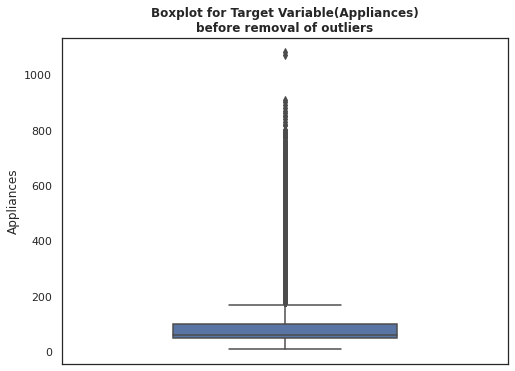

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Appliances'], width=0.5)
plt.ylabel('Appliances')
plt.title("Boxplot for Target Variable(Appliances)\nbefore removal of outliers", fontweight = 'bold')
plt.show()

In [ ]:
# Outlier removal fuction
def remove_outlier(df):
  """
  This fuction is used for Outlier Removal.
  """
  
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
  return df

temp_series = remove_outlier(df.Appliances)
temp_df = pd.DataFrame(temp_series)
ind_diff= df.index.difference(temp_df.index)

for i in range(0, len(ind_diff),1):
  df = df.drop([ind_diff[i]])

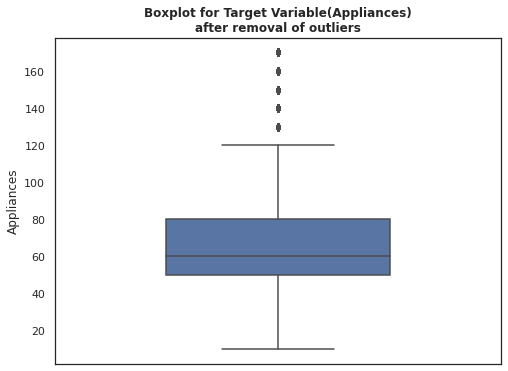

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Appliances'], width=0.5)
plt.ylabel('Appliances')
plt.title("Boxplot for Target Variable(Appliances)\nafter removal of outliers", fontweight = 'bold')
plt.show()



* **We observe that most of Outliers were removed from our dataset.**



#### 3.2 Scaling DataFrame

In [ ]:
# Train Test Spitting
scaler = MinMaxScaler()
X = df[[col for col in df.columns if col not in ['Appliances']]]
y = df['Appliances']

X_scale = scaler.fit_transform(X)
y_scale = scaler.fit_transform(y.values.reshape([-1,1])).flatten()

X_train,X_test,y_train,y_test = train_test_split(X_scale,y_scale,test_size = 0.3, random_state = 0)

In [ ]:
y_scale

array([0.3125, 0.3125, 0.25  , ..., 0.5   , 0.5625, 0.5   ])

In [ ]:
print(f'Scaled Feature values :\n{X_scale}\n')
print('-*'*40)
print(f'Scaled Target values:\n{y_scale}')

Scaled Feature values :
[[0.32943677 0.63089032 0.22534529 ... 0.         0.73913043 0.33333333]
 [0.32943677 0.60318921 0.22534529 ... 0.         0.73913043 0.33333333]
 [0.32943677 0.59112747 0.22534529 ... 0.         0.73913043 0.33333333]
 ...
 [0.92915338 0.60830011 0.71805185 ... 1.         0.73913043 0.86666667]
 [0.93269571 0.59910048 0.71165496 ... 1.         0.73913043 0.86666667]
 [0.92561105 0.59726055 0.70176884 ... 1.         0.73913043 0.86666667]]

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Scaled Target values:
[0.3125 0.3125 0.25   ... 0.5    0.5625 0.5   ]




* **We see that our Feature values and Target values have been scaled between 0 and 1.**



#### **3.3 Optimised Code**

In [ ]:
def models():
  '''
  This Function returns a dictionary of Regression Algorithms 
  '''
  models = dict()
  models['Linear Regression'] = LinearRegression()
  models['knn'] = KNeighborsRegressor()
  models['Decision Tree'] = DecisionTreeRegressor()
  models['SVM'] = SVR()
  models['XGBoost'] = XGBRegressor()
  models['Extra Trees Regressor'] = ExtraTreesRegressor()
  models['Random Forest'] = RandomForestRegressor()
  models['Bagging Regressor'] = BaggingRegressor(base_estimator=KNeighborsRegressor())
  return models

In [ ]:
def model_predictions(models,X_train,X_test,y_train):
    '''
    This function is used for training and testing our list of models, 
    which is used for returning training and testing predictions those in turn used for evaluation.  
    '''
    names=[]
    training_preds = []
    test_preds = []
    
    for name, model in models.items():                               # Looping over our list of models
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train).tolist()
        training_preds.append(train_pred)
        names.append(name)
        
        test_pred = model.predict(X_test).tolist()
        test_preds.append(test_pred)
            
    training_pred_dict = dict(zip(names, training_preds))            # Zipping our models and their 
                                                                     # corresponding training predictions into a dictionary.
    
    train_pred_df = pd.DataFrame.from_dict(training_pred_dict)       # We're converting the above dictionary to a DataFrame.
    
    
    test_pred_dict = dict(zip(names, test_preds))                    # Zipping our models and their 
                                                                     # corresponding test predictions into a dictionary.
    
    test_pred_df = pd.DataFrame.from_dict(test_pred_dict)            # We're converting the above dictionary to a DataFrame.
    
    return train_pred_df,test_pred_df

In [ ]:
def evaluation_function(y_train, y_test, train_pred_df, test_pred_df, metric_name):
    '''
    This function is used to compute the Evaluation Metrics for traing and test predictions of our list of models 
    '''
    models = train_pred_df.columns.tolist()

    metrics_train = []
    metrics_test = []
    for model in models:
        if metric_name == 'MSE': # Mean Squarred Error
            metric_train = mean_squared_error(y_train, train_pred_df[model])  
            metric_test = mean_squared_error(y_test, test_pred_df[model])  
        elif metric_name == 'RMSE': # Root Mean Squarred Error
            metric_train = mean_squared_error(y_train, train_pred_df[model], squared=False)
            metric_test = mean_squared_error(y_test, test_pred_df[model],squared=False)  
        elif metric_name == 'RMSLE': # Root Mean Squarred Logerithmic Error
            metric_train = metrics.mean_squared_log_error(y_train, train_pred_df[model], squared=False)
            metric_test = metrics.mean_squared_log_error(y_test, test_pred_df[model],squared=False)  
        elif metric_name == 'r2_score': # R-squarred Score
            metric_train = r2_score(y_train, train_pred_df[model])
            metric_test = r2_score(y_test, test_pred_df[model])
        metrics_train.append(metric_train)
        metrics_test.append(metric_test)

    metrics_train_dict = dict(zip(models, metrics_train))  # Zipping our models and their corresponding 
                                                           # Evaluation results of training predictions into a dictionary.

    metrics_test_dict = dict(zip(models,metrics_test))  # Zipping our models and their corresponding 
                                                        # Evaluation results of test predictions into a dictionary.
    
    metrics_dict={'train':metrics_train_dict,
                 'test':metrics_test_dict}
    metrics_df = pd.DataFrame(metrics_dict)    # Converting our metric dictionaries into a DataFrame.
    metrics_df = metrics_df.transpose()        # Transposing the above DataFrame for our convenience
    metrics_df['Evaluation'] = metric_name     
    first_col = metrics_df.pop('Evaluation')
    metrics_df.insert(0, 'Evaluation', first_col)
    return metrics_df

In [ ]:
# Capturing train and test predictions in a DataFrame.
train_pred_df,test_pred_df = model_predictions(models(),X_train,X_test,y_train)

[14:46:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Displaying Evaluation results(r2_scores) for all the models
evaluation_function(y_train, y_test, train_pred_df, test_pred_df, 'r2_score')

Evaluation  Linear Regression       knn  Decision Tree       SVM  \
train   r2_score           0.329866  0.700366       1.000000  0.630196   
test    r2_score           0.342125  0.567250       0.462902  0.594094   

        XGBoost  Extra Trees Regressor  Random Forest  Bagging Regressor  
train  0.565301               1.000000       0.956366           0.704299  
test   0.539436               0.697917       0.705989           0.573929

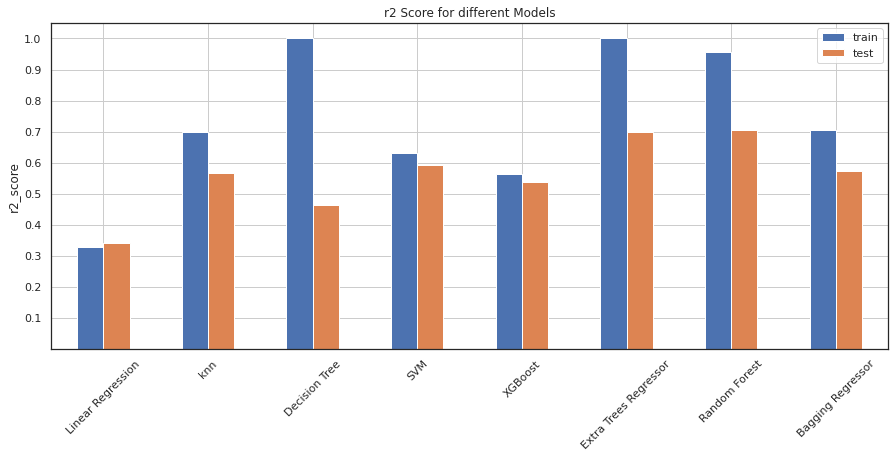

In [ ]:
r2 = evaluation_function(y_train, y_test, train_pred_df, test_pred_df, 'r2_score')
r2.transpose().iloc[1:,:].plot(kind='bar',figsize=(15,6))
plt.ylabel('r2_score')
plt.title('r2 Score for different Models')
plt.xticks(rotation=45)
plt.yticks(ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid()
plt.show()

In [ ]:
# Displaying Evaluation results(RMSEs) for all the models
evaluation_function(y_train, y_test, train_pred_df, test_pred_df, 'RMSE')

Evaluation  Linear Regression       knn  Decision Tree       SVM  \
train       RMSE           0.145415  0.097235       0.000000  0.108023   
test        RMSE           0.145057  0.117648       0.131067  0.113941   

        XGBoost  Extra Trees Regressor  Random Forest  Bagging Regressor  
train  0.117118               0.000000       0.037106           0.096595  
test   0.121370               0.098295       0.096973           0.116737

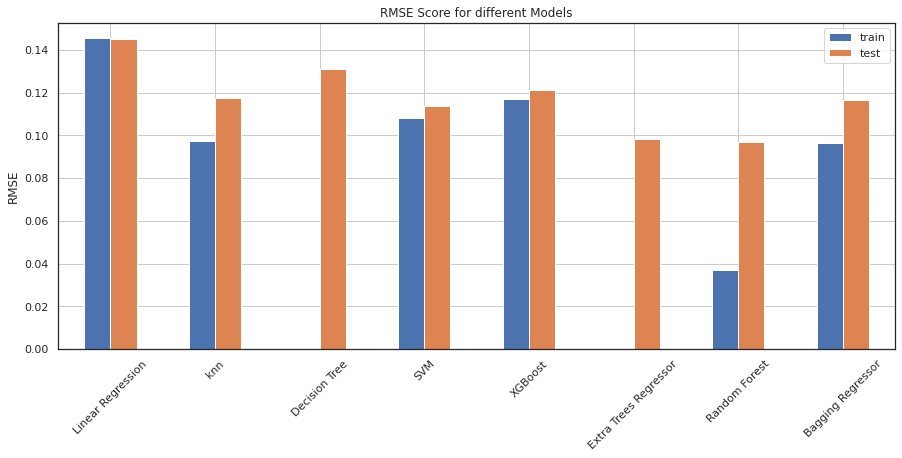

In [ ]:
RMSE = evaluation_function(y_train,y_test,train_pred_df,test_pred_df,'RMSE')
RMSE.transpose().iloc[1:,:].plot(kind='bar',figsize=(15,6))
plt.ylabel('RMSE')
plt.title('RMSE Score for different Models')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# Displaying Evaluation results(MSEs) for all the models
evaluation_function(y_train, y_test, train_pred_df, test_pred_df, 'MSE')

Evaluation  Linear Regression       knn  Decision Tree       SVM  \
train        MSE           0.021146  0.009455       0.000000  0.011669   
test         MSE           0.021042  0.013841       0.017179  0.012983   

        XGBoost  Extra Trees Regressor  Random Forest  Bagging Regressor  
train  0.013717               0.000000       0.001377           0.009331  
test   0.014731               0.009662       0.009404           0.013628

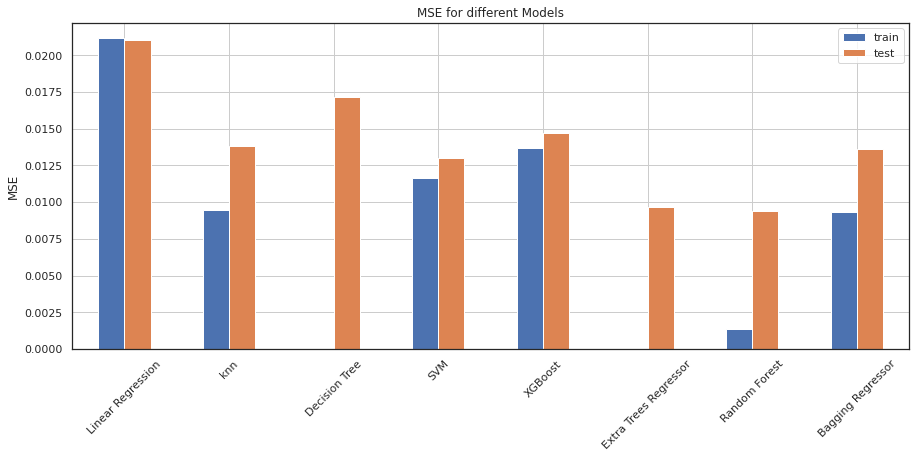

In [ ]:
MSE = evaluation_function(y_train,y_test,train_pred_df,test_pred_df,'MSE')
MSE.transpose().iloc[1:,:].plot(kind='bar',figsize=(15,6))
plt.ylabel('MSE')
plt.title('MSE for different Models')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### **Observation :**

#### * **Taking 0.5 as a cutoff for R-squarred score, Extra Trees regressor, Random Forest Regressor, SVM, KNN, XGBoost and Bagging Regressors are performing well.** 

#### * **But, Random forest regressor and Extra Trees Regressor outperformed above models without tuning.**

#### * **We can observe from above Graphs that Decision Tree is a stronglearner compared to any other model. So, we choose to Hypertune only the ensmeble methods of Decision Tree.**  








### **4.** **Hyperparameter Tuning**

 **4.1 Hyperparameter tuning for ExtraTreesRegressor**

In [ ]:
# Hyperparameters tuning.
param_grid = [{
    'max_depth' : [80, 100, 110, 120],
    'max_features': [7, 9, 11, 13, 15],
    'min_samples_split' : [4, 5, 6, 7, 8],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'n_estimators': [2000]
}]


ext_reg = ExtraTreesRegressor()
ext_reg_random = RandomizedSearchCV(estimator = ext_reg, param_distributions = param_grid, cv = 10,n_iter=10,random_state=0, n_jobs = -1, verbose=3)
ext_reg_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
                   param_distributions=[{'max_depth': [80, 100, 110, 120],
                                         'max_features': [7, 9, 11, 13, 15],
                                         'min_samples_leaf': [1, 2, 3, 5, 7],
                                         'min_samples_split': [4, 5, 6, 7, 8],
                                         'n_estimators': [2000]}],
                   random_state=0, verbose=3)

In [ ]:
ext_reg_random.best_estimator_

ExtraTreesRegressor(max_depth=100, max_features=9, min_samples_split=7,
                    n_estimators=2000)

In [ ]:
new_pred = ext_reg_random.best_estimator_.predict(X_test)

In [ ]:
# Displaying the Training Error
MSE_ext_train  = mean_squared_error(y_train, ext_reg_random.best_estimator_.predict(X_train))
print("Training MSE :" , MSE_ext_train)

RMSE_train_ext = np.sqrt(MSE_ext_train)
print("Training RMSE :" ,RMSE_train_ext)

r2_train_ext = r2_score(y_train, ext_reg_random.best_estimator_.predict(X_train))
print("Training R2 score :" ,r2_train_ext)
print("Trainig Adjusted R2 score: ",1-(1-r2_score(y_train, ext_reg_random.best_estimator_.predict(X_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),'\n','-*-'*50,'\n')


# Displaying the testMSE_ext_test  = mean_squared_error(y_test, new_pred)
MSE_ext_test  = mean_squared_error(y_test,ext_reg_random.best_estimator_.predict(X_test))
print("test MSE :" , MSE_ext_test)

RMSE_test_ext = np.sqrt(MSE_ext_test)
print("test RMSE :" ,RMSE_test_ext)

r2_test_ext = r2_score(y_test,ext_reg_random.best_estimator_.predict(X_test))
print("test R2 score :",r2_test_ext)
print("test Adjusted R2 score: ",1-(1-r2_score(y_test, ext_reg_random.best_estimator_.predict(X_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),'\n','-*-'*50,'\n')


Training MSE : 0.0022791520396232352
Training RMSE : 0.0477404654315732
Training R2 score : 0.9277703207069748
Trainig Adjusted R2 score:  0.9275998429093434 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

test MSE : 0.009161695541735774
test RMSE : 0.095716746401744
test R2 score : 0.7135553135373613
test Adjusted R2 score:  0.7119730476502344 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 



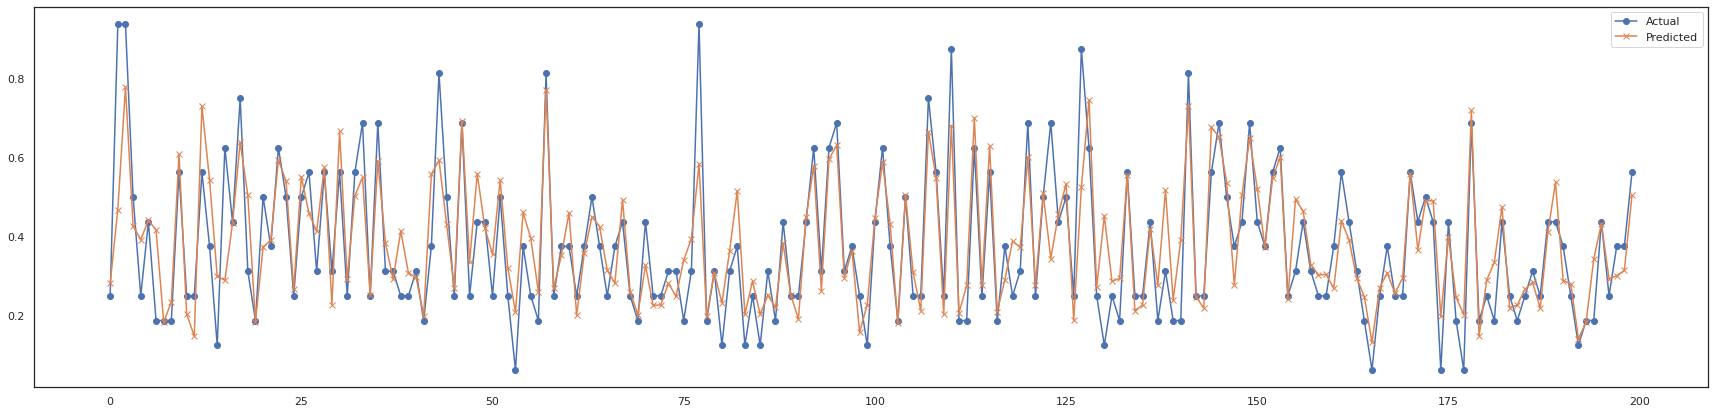

In [ ]:
# Plot for actual and predicted datapoints for first 200 rows
plt.figure(figsize=(30,7))
plt.plot(np.array(y_test[:200]),marker='o')
plt.plot(np.array(new_pred[:200]),marker='x')
plt.legend(['Actual','Predicted'])
plt.show()

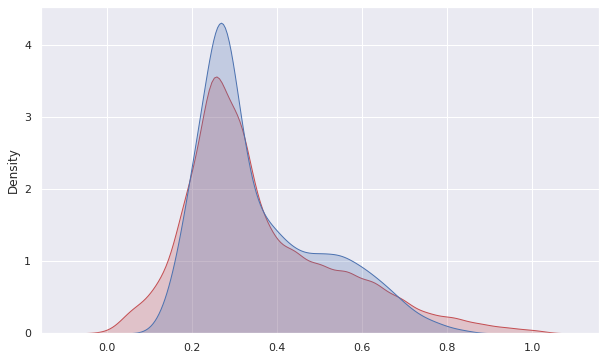

In [ ]:
# set a grey background 
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(y_test, shade=True, color="r")
fig = sns.kdeplot(new_pred, shade=True, color="b")

plt.show()

 **4.2 Hyper-parameter tuning for Xgboost**

In [ ]:
# Hyperparameters tuning.
random_grid = {'n_estimators': [30, 50, 700],
               'max_depth': [6, 7, 10, 30],
               'booster' : ['gblinear','gbtree','dart']
               }
xgb_reg = XGBRegressor()
xgb_reg_random = RandomizedSearchCV(estimator=xgb_reg, param_distributions = random_grid,n_iter=10,random_state=0,cv=3,n_jobs=-1,verbose=2)

In [ ]:
xgb_reg_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[07:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=-1,
                   param_distributions={'booster': ['gblinear', 'gbtree',
                                                    'dart'],
                                        'max_depth': [6, 7, 10, 30],
                                        'n_estimators': [30, 50, 700]},
                   random_state=0, verbose=2)

In [ ]:
xgb_reg_random.best_estimator_

XGBRegressor(booster='dart', max_depth=7, n_estimators=700)

In [ ]:
# Displaying the Training Error
MSE_xgb_train  = mean_squared_error(y_train,xgb_reg_random.best_estimator_.predict(X_train))
print("Training MSE :" , MSE_xgb_train)

RMSE_train_xgb = np.sqrt(MSE_xgb_train)
print("Training RMSE :" ,RMSE_train_xgb)

r2_train_xgb = r2_score(y_train, xgb_reg_random.best_estimator_.predict(X_train))
print("Training R2 score :" ,r2_train_xgb)
print("Trainig Adjusted R2 score: ",1-(1-r2_score(y_train,xgb_reg_random.best_estimator_.predict(X_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),'\n','-*-'*50,'\n')



# Displaying the test Error
MSE_xgb_test  = mean_squared_error(y_test,xgb_reg_random.best_estimator_.predict(X_test))
print("test MSE :" , MSE_xgb_test)

RMSE_test_xgb = np.sqrt(MSE_xgb_test)
print("test RMSE :" ,RMSE_test_xgb)

r2_test_xgb = r2_score(y_test,xgb_reg_random.best_estimator_.predict(X_test))
print("test R2 score :" ,r2_test_xgb)
print("test Adjusted R2 score: ",1-(1-r2_score(y_test,xgb_reg_random.best_estimator_.predict(X_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),'\n','-*-'*50,'\n')


Training MSE : 0.0008472341490312861
Training RMSE : 0.02910728687169737
Training R2 score : 0.9731499040841763
Trainig Adjusted R2 score:  0.9730865320013604 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

test MSE : 0.010069624808909699
test RMSE : 0.10034752019312534
test R2 score : 0.6851684813095121
test Adjusted R2 score:  0.6834294119681742 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 



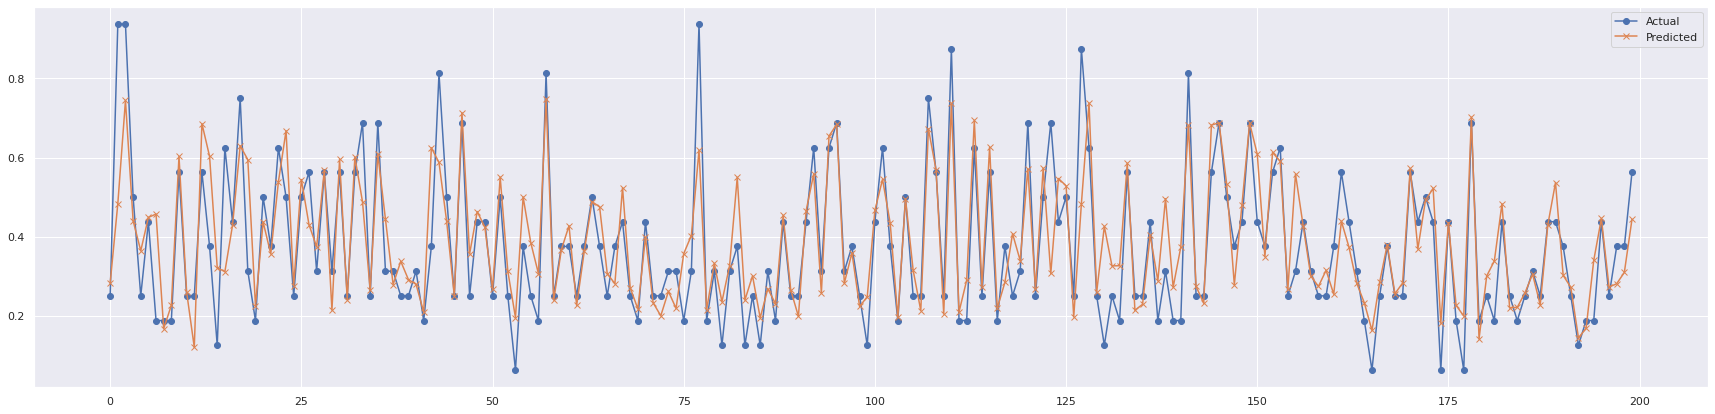

In [ ]:
# Plot for actual and predicted datapoints for first 200 rows
plt.figure(figsize=(30,7))
plt.plot(np.array(y_test[:200]),marker='o')
plt.plot(np.array(xgb_reg_random.best_estimator_.predict(X_test)[:200]),marker='x')
plt.legend(['Actual','Predicted'])
plt.show()

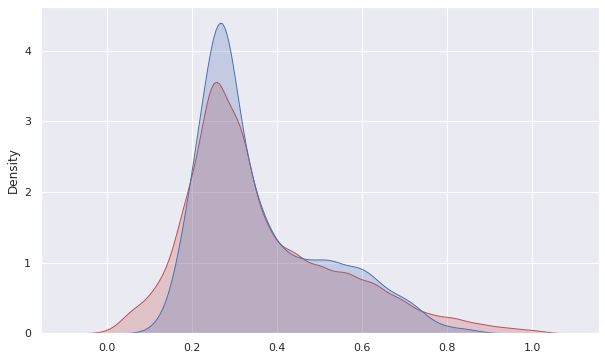

In [ ]:
# set a grey background 
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(y_test, shade=True, color="r")
fig = sns.kdeplot(xgb_reg_random.best_estimator_.predict(X_test), shade=True, color="b")

plt.show()

 **4.3 Hyperparameter Tuning for Random Forest Regressor**

In [ ]:
# Hyperparameters tuning.
param_grid = [{  'bootstrap': [True],
    'max_depth': [1110,120,130],
    'max_features': [7, 9, 11],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [2000]}]

rf_reg = RandomForestRegressor()
rf_reg_random = RandomizedSearchCV(estimator=rf_reg, param_distributions = param_grid,cv=5,n_iter=10,random_state=0,n_jobs=-1,verbose=2)
rf_reg_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True],
                                         'max_depth': [1110, 120, 130],
                                         'max_features': [7, 9, 11],
                                         'min_samples_leaf': [1, 2],
                                         'min_samples_split': [2, 3],
                                         'n_estimators': [2000]}],
                   random_state=0, verbose=2)

In [ ]:
rf_reg_random.best_estimator_

RandomForestRegressor(max_depth=120, max_features=9, n_estimators=2000)

In [ ]:
new_pred = rf_reg_random.best_estimator_.predict(X_test)

In [ ]:
# Displaying the Training Error
MSE_rf_train  = mean_squared_error(y_train,rf_reg_random.best_estimator_.predict(X_train))
print("Training MSE :" , MSE_rf_train)

RMSE_train_rf = np.sqrt(MSE_rf_train)
print("Training RMSE :" ,RMSE_train_rf)

r2_train_rf = r2_score(y_train,rf_reg_random.best_estimator_.predict(X_train))
print("Training R2 score :" ,r2_train_rf)
print("Trainig Adjusted R2 score: ",1-(1-r2_score(y_train,rf_reg_random.best_estimator_.predict(X_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),'\n','-*-'*50,'\n')



# Displaying the test Error
MSE_rf_test  = mean_squared_error(y_test,rf_reg_random.best_estimator_.predict(X_test))
print("test MSE :" , MSE_rf_test)

RMSE_test_rf = np.sqrt(MSE_rf_test)
print("test RMSE :" ,RMSE_test_rf)

r2_test_rf = r2_score(y_test,rf_reg_random.best_estimator_.predict(X_test))
print("test R2 score :" ,r2_test_rf)
print("test Adjusted R2 score: ",1-(1-r2_score(y_test,rf_reg_random.best_estimator_.predict(X_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),'\n','-*-'*50,'\n')


Training MSE : 0.0012798471937762596
Training RMSE : 0.03577495204436003
Training R2 score : 0.959439760602448
Trainig Adjusted R2 score:  0.9593440295906038 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

test MSE : 0.009092244033905955
test RMSE : 0.09535325916771778
test R2 score : 0.7157267473395483
test Adjusted R2 score:  0.7141564760391382 
 -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 



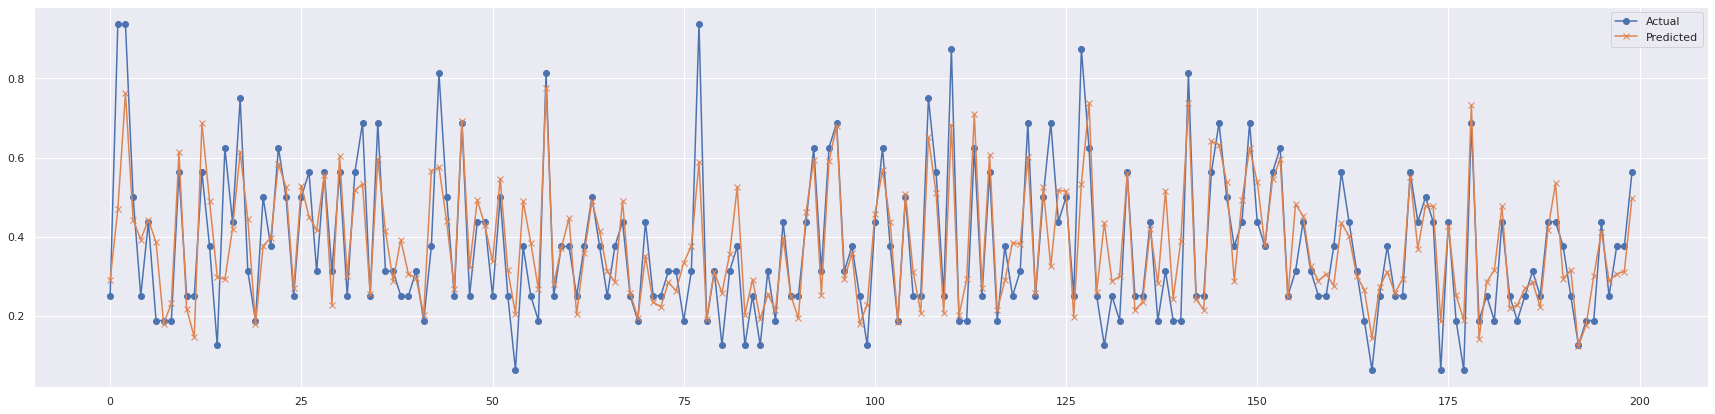

In [ ]:
# Plot for actual and predicted datapoints for first 200 rows
plt.figure(figsize=(30,7))
plt.plot(np.array(y_test[:200]),marker='o')
plt.plot(np.array(rf_reg_random.best_estimator_.predict(X_test)[:200]),marker='x')
plt.legend(['Actual','Predicted'])
plt.show()

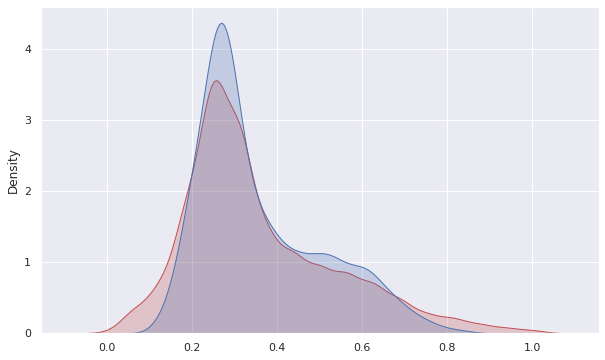

In [ ]:
# set a grey background 
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(y_test, shade=True, color="r")
fig = sns.kdeplot(rf_reg_random.best_estimator_.predict(X_test), shade=True, color="b")

plt.show()

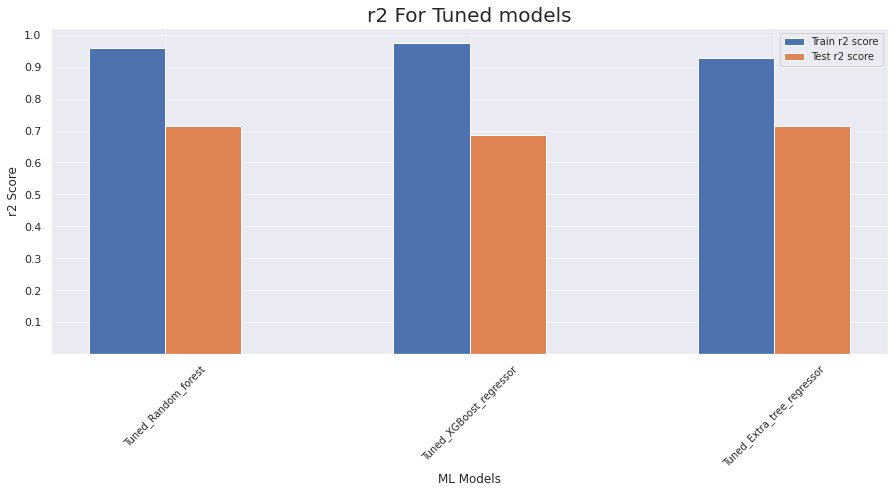

In [ ]:
# Plot of R-squared scores for different Hypertuned models
plt.figure(figsize=(15,6))
plt.grid(alpha=0.4)
plt.bar(np.arange(3)-0.125,[r2_train_rf,r2_train_xgb,r2_train_ext,],width=0.25,label='Train r2 score')
plt.bar(np.arange(3)+0.125,[r2_test_rf,r2_test_xgb,r2_test_ext],width=0.25,label='Test r2 score')
plt.xticks(ticks=np.arange(3),labels=['Tuned_Random_forest','Tuned_XGBoost_regressor','Tuned_Extra_tree_regressor'],rotation=45,fontsize=10)
plt.yticks(ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlabel('ML Models',fontsize=12)
plt.ylabel('r2 Score',fontsize=12)
plt.title('r2 For Tuned models',fontsize=20)
plt.legend(prop={'size':10})
plt.show()

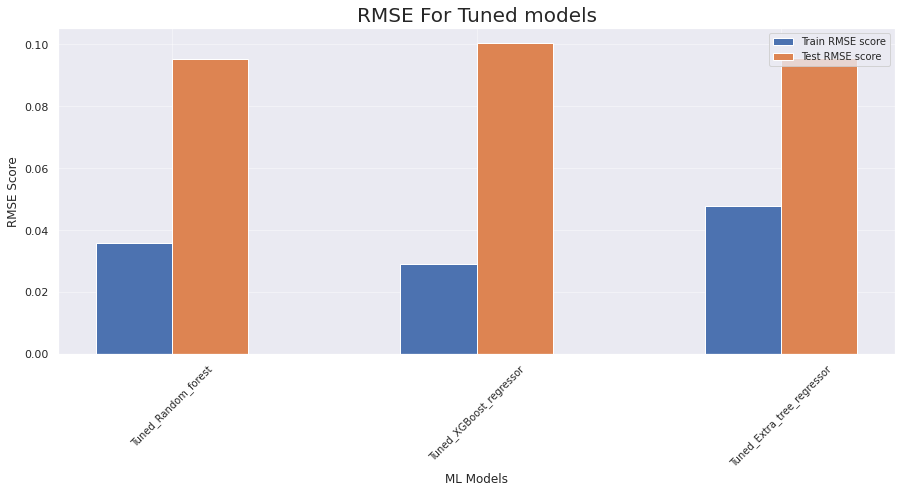

In [ ]:
# Plot of MSEs for different Hypertuned models
plt.figure(figsize=(15,6))
plt.grid(alpha=0.4)
plt.bar(np.arange(3)-0.125,[RMSE_train_rf, RMSE_train_xgb, RMSE_train_ext],width=0.25,label='Train RMSE score')
plt.bar(np.arange(3)+0.125,[RMSE_test_rf, RMSE_test_xgb, RMSE_test_ext],width=0.25,label='Test RMSE score')
plt.xticks(ticks=np.arange(3),labels=['Tuned_Random_forest','Tuned_XGBoost_regressor','Tuned_Extra_tree_regressor'],rotation=45,fontsize=10)
plt.xlabel('ML Models',fontsize=12)
plt.ylabel('RMSE Score',fontsize=12)
plt.title('RMSE For Tuned models',fontsize=20)
plt.legend(prop={'size':10})
plt.show()

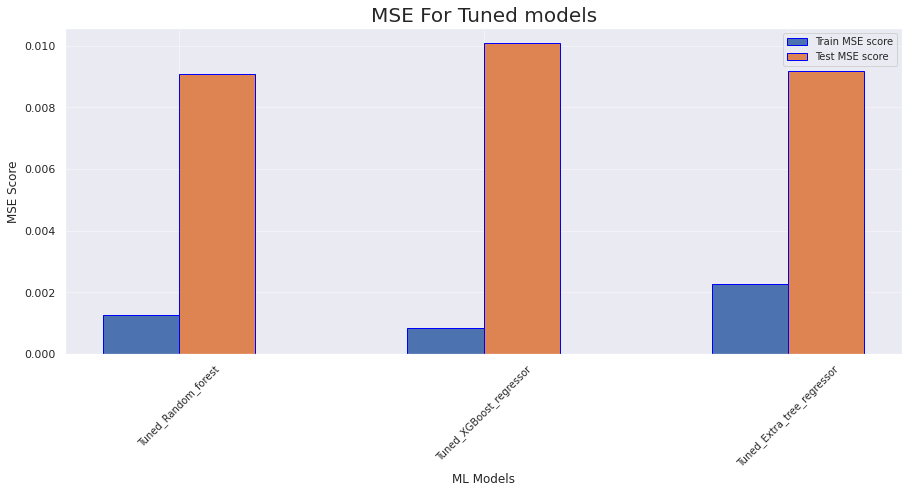

In [ ]:
# Plot of RMSEs for different Hypertuned models
plt.figure(figsize=(15,6))
plt.grid(alpha=0.4)
plt.bar(np.arange(3)-0.125,[MSE_rf_train,MSE_xgb_train,MSE_ext_train,],width=0.25,label='Train MSE score',edgecolor='blue')
plt.bar(np.arange(3)+0.125,[MSE_rf_test,MSE_xgb_test,MSE_ext_test],width=0.25,label='Test MSE score',edgecolor='blue')
plt.xticks(ticks=np.arange(3),labels=['Tuned_Random_forest','Tuned_XGBoost_regressor','Tuned_Extra_tree_regressor'],rotation=45,fontsize=10)
plt.xlabel('ML Models',fontsize=12)
plt.ylabel('MSE Score',fontsize=12)
plt.title('MSE For Tuned models',fontsize=20)
plt.legend(prop={'size':10})
plt.show()



* **We observe from above graphs that Extra Trees Regressor is giving more generalised model compared to Random Forest Regressor and XGBoost.**

* **R-squared value of test set for Extra Trees Regressor has improved after tuning from 0.700 to 0.712**

* **R-squared value of train set for Extra Trees Regressor has decreased after tuning from 1.00 to 0.93, which means that the model is not overfitting anymore and it's a more generalised.**








#### **4.1** **Stacking**

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.3, random_state = 0)

In [ ]:
# Model initialization
 
model_xgb = XGBRegressor(booster='dart', max_depth=7, n_estimators=700, random_state=0)
model_rf = RandomForestRegressor(max_depth=120, max_features=9, n_estimators=2000, random_state=0)
model_etr = ExtraTreesRegressor(max_depth=100, max_features=9, min_samples_split=7,n_estimators=2000, random_state=0)

In [ ]:
# XGBoost with Best Parameters
model_xgb = XGBRegressor(booster='dart', max_depth=7, n_estimators=700, random_state=0)
model_xgb.fit(X_train, y_train)
print(f'Train r2_score from XGBoost : {r2_score(y_train, model_xgb.predict(X_train))}')
print(f'Test r2_score from XGBoost : {r2_score(y_test, model_xgb.predict(X_test))}')

[16:04:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2_score from XGBoost : 0.9731499040841763
Test r2_score from XGBoost : 0.6851684813095121


In [ ]:
# Random Forest with Best Parameters
model_rf = RandomForestRegressor(max_depth=120, max_features=9, n_estimators=2000, random_state=0)
model_rf.fit(X_train, y_train)
print(f'Train r2_score from Random Forest : {r2_score(y_train, model_rf.predict(X_train))}')
print(f'Test r2_score from Random Forest : {r2_score(y_test, model_rf.predict(X_test))}')

Train r2_score from Random Forest : 0.9595340189246152
Test r2_score from Random Forest : 0.7152120711220493


In [ ]:
# Extra Trees with Best Parameters
model_etr = ExtraTreesRegressor(max_depth=100, max_features=9, min_samples_split=7,n_estimators=2000, random_state=0)
model_etr.fit(X_train, y_train)
print(f'Train r2_score from Extra Trees : {r2_score(y_train, model_etr.predict(X_train))}')
print(f'Test r2_score from Extra Trees : {r2_score(y_test, model_etr.predict(X_test))}')

Train r2_score from Extra Trees : 0.9278534032622757
Test r2_score from Extra Trees : 0.7134275316800507


In [ ]:
base_models = [['xgboost',model_xgb], ['rf',model_rf], ['etr',model_etr]]

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
meta_model = ExtraTreesRegressor(max_depth=20, max_features=2, min_samples_split=7,n_estimators=2000, random_state=0)

In [ ]:
stack_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

In [ ]:
stack_model.fit(X_train, y_train)

[08:41:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:57:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=5,
                  estimators=[['xgboost',
                               XGBRegressor(booster='dart', max_depth=7,
                                            n_estimators=700)],
                              ['rf',
                               RandomForestRegressor(max_depth=120,
                                                     max_features=9,
                                                     n_estimators=2000,
                                                     random_state=0)],
                              ['etr',
                               ExtraTreesRegressor(max_depth=100,
                                                   max_features=9,
                                                   min_samples_split=7,
                                                   n_estimators=2000,
                                                   random_state=0)]],
                  final_estimator=ExtraTreesRegressor(max_depth=20,
                             

In [ ]:
r2_train_stack = r2_score(y_train, stack_model.predict(X_train))
r2_test_stack = r2_score(y_test, stack_model.predict(X_test))

In [ ]:
print(f'Train r2 for Stacking : {r2_train_stack}')
print(f'Test r2 for Stacking: {r2_test_stack}')

Train r2 for Stacking : 0.9270943016259064
Test r2 for Stacking: 0.7011097886391899


In [ ]:
dict_score = {'r2_train' : r2_train_stack, 'r2_test' : r2_test_stack}
scores = list(dict_score.keys())
values = list(dict_score.values())

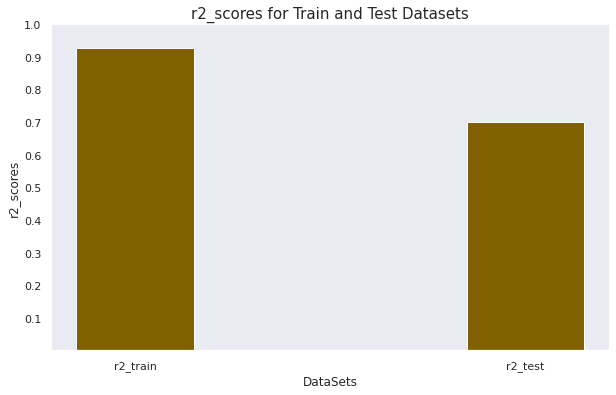

In [ ]:
plt.bar(scores, values, width = 0.3, color = '#806000')
plt.xlabel("DataSets", fontsize = 12)
plt.ylabel("r2_scores", fontsize = 12)
plt.title("r2_scores for Train and Test Datasets", fontsize = 15)
plt.yticks(ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid()
plt.show()

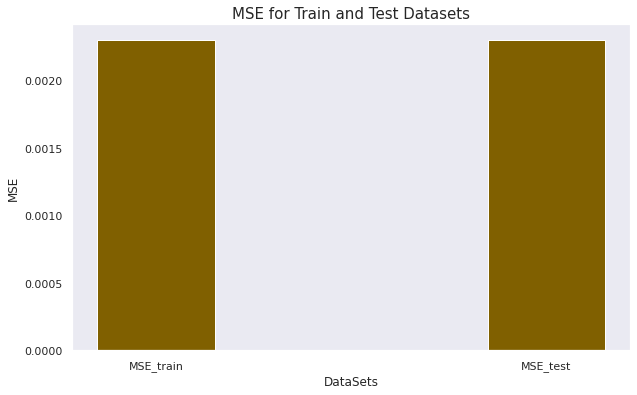

In [ ]:
dict_score2 = {'MSE_train' : mean_squared_error(y_train, stack_model.predict(X_train)), 'MSE_test' : mean_squared_error(y_train, stack_model.predict(X_train))}
scores2 = list(dict_score2.keys())
values2 = list(dict_score2.values())

plt.bar(scores2, values2, width = 0.3, color = '#806000')
plt.xlabel("DataSets", fontsize = 12)
plt.ylabel("MSE", fontsize = 12)
plt.title("MSE for Train and Test Datasets", fontsize = 15)
plt.grid()
plt.show()

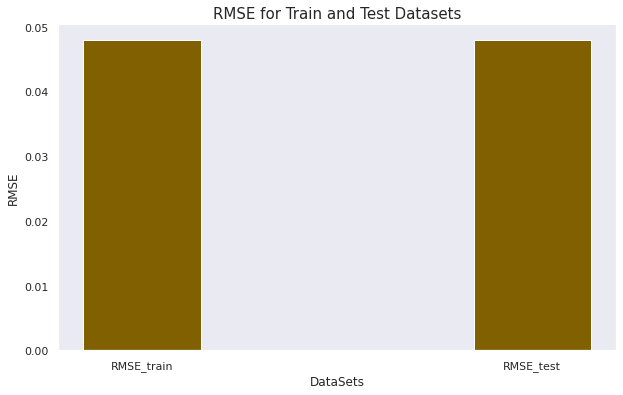

In [ ]:
dict_score3 = {'RMSE_train' : np.sqrt(mean_squared_error(y_train, stack_model.predict(X_train))), 'RMSE_test' : np.sqrt(mean_squared_error(y_train, stack_model.predict(X_train)))}
scores3 = list(dict_score3.keys())
values3 = list(dict_score3.values())

plt.bar(scores3, values3, width = 0.3, color = '#806000')
plt.xlabel("DataSets", fontsize = 12)
plt.ylabel("RMSE", fontsize = 12)
plt.title("RMSE for Train and Test Datasets", fontsize = 15)
plt.grid()
plt.show()

### **Observation:**
####* **We observe that as we performed Stacking with HyperTuned Bese models(Random Forest Regressor, XGBoost Regressor and Extra Trees Regressor), the results are closer to those of Hypertuned Extra Trees Regressor, but Hypertuned Extra Trees Regressor is performing slightly better.**


####* **Hence our choice of model is Hypertuned Extra Trees Regressor.** 




### 5. **Feature Importance**

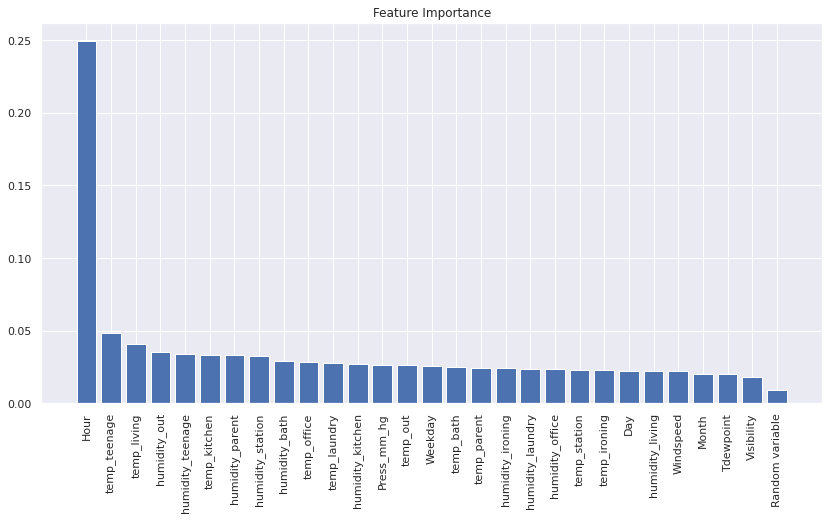

In [ ]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(model_etr.feature_importances_)
importances = model_etr.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(14,7))
# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

#### **Modeling with top 10 features**

In [ ]:
# Selecting top 10 features for modeling.
X_selected = df[names[:10]]
y_selected = df['Appliances']

X_selected_scale = scaler.fit_transform(X_selected)
y_selected_scale = scaler.fit_transform(y_selected.values.reshape([-1,1])).flatten()

X_selected_train,X_selected_test,y_selected_train,y_selected_test = train_test_split(X_selected_scale,y_selected_scale,test_size = 0.3, random_state = 0)

In [ ]:
# Fitting best model with its parameter on reduced dataset

best_model = ext_reg_random.best_estimator_
best_model.fit(X_selected_train, y_selected_train)

ExtraTreesRegressor(max_depth=100, max_features=9, min_samples_split=7,
                    n_estimators=2000)

In [ ]:
# Reduced dataset scores 
feature_train_r2= metrics.r2_score(y_selected_train,best_model.predict(X_selected_train))
feature_test_r2= metrics.r2_score(y_selected_test,best_model.predict(X_selected_test))
feature_train_rmse= np.sqrt(mean_squared_error(y_selected_train,best_model.predict(X_selected_train)))
feature_test_rmse= np.sqrt(mean_squared_error(y_selected_test, best_model.predict(X_selected_test)))
feature_train_mse= mean_squared_error(y_selected_train,best_model.predict(X_selected_train))
feature_test_mse= mean_squared_error(y_selected_test, best_model.predict(X_selected_test))
print('Training set R2 Score - ', feature_train_r2)
print('Testing set R2 Score - ',feature_test_r2 )
print('Training set RMSE Score - ', feature_train_rmse)
print('Testing set RMSE Score - ',feature_test_rmse )
print('Training set MSE Score - ', feature_train_mse)
print('Testing set MSE Score - ', feature_test_mse)

Training set R2 Score -  0.9229975324226091
Testing set R2 Score -  0.695108964811358
Training set RMSE Score -  0.04929253196216106
Testing set RMSE Score -  0.09875062883294286
Training set MSE Score -  0.0024297537072406694
Testing set MSE Score -  0.009751686694901646


### **Evaluation Metrics Comparision (with all features V/s With selected Features)**

* **Evaluation Metric -> R2_score**



[]

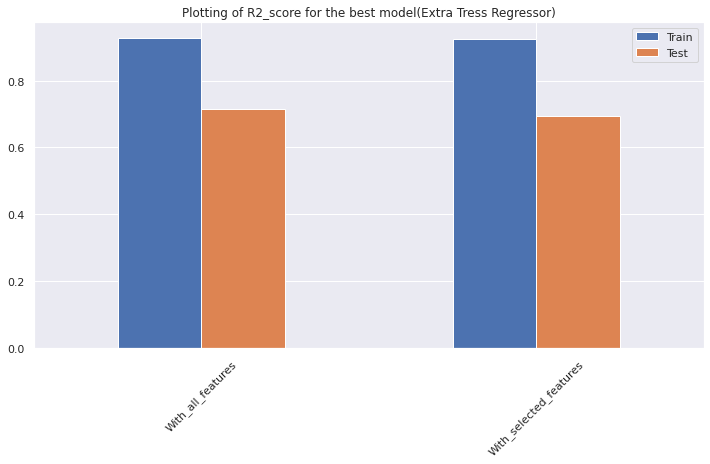

In [ ]:
pd.DataFrame({'Train':[r2_train_ext,feature_train_r2],
              'Test':[r2_test_ext,feature_test_r2]},index=['With_all_features','With_selected_features']).plot(kind='bar',figsize=(12,6))
plt.title('Plotting of R2_score for the best model(Extra Tress Regressor)')
plt.xticks(rotation=45)
plt.plot()

* **Evaluation Metric -> RMSE_value**



[]

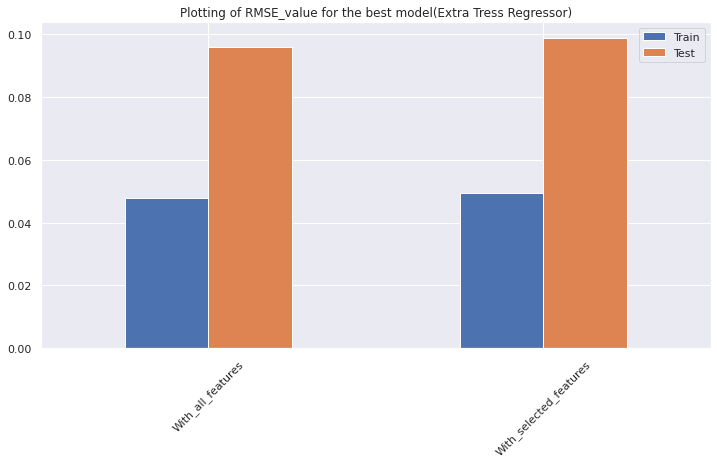

In [ ]:
pd.DataFrame({'Train':[RMSE_train_ext,feature_train_rmse],
              'Test':[RMSE_test_ext,feature_test_rmse]},index=['With_all_features','With_selected_features']).plot(kind='bar',figsize=(12,6))
plt.title('Plotting of RMSE_value for the best model(Extra Tress Regressor)')
plt.xticks(rotation=45)
plt.plot()

* **Evaluation Metric -> MSE_value**



[]

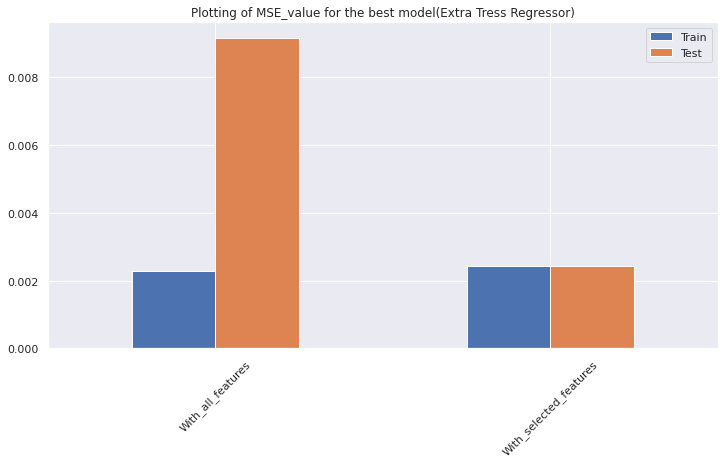

In [ ]:
pd.DataFrame({'Train':[MSE_ext_train,feature_train_mse],
              'Test':[MSE_ext_test,feature_train_mse]},index=['With_all_features','With_selected_features']).plot(kind='bar',figsize=(12,6))
plt.title('Plotting of MSE_value for the best model(Extra Tress Regressor)')
plt.xticks(rotation=45)
plt.plot()

### **Observation:**
####* **Model is performing well with selected features nearly as same as it's performing with all the features.**


##**Conclusion:**

####*  **Even though Stacking and modeling with selected features are performing good, they're not an improvement over Hyper-tuned Extra-Trees Regressor.**
####*   **Therefore, the Hyper-tuned Extra-Trees Regressor is the best model for Appliance Energy Prediction for the data provided.**



